In [69]:
#import statements
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import spicy
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [98]:
#reading dataset
population_data = pd.read_csv('world_population.csv')
population_data

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [32]:
#classification based on rank 
def explore(row: float):
  if row >= 117.500000:
    return '0'
  else:
    return '1'

ranks = population_data['Rank'].tolist()
classified_data = []
for i in ranks :
  classified_data.append(explore(i))

population_data['class']=classified_data
print(population_data)

     Rank CCA3            Country           Capital Continent  \
0      36  AFG        Afghanistan             Kabul      Asia   
1     138  ALB            Albania            Tirana    Europe   
2      34  DZA            Algeria           Algiers    Africa   
3     213  ASM     American Samoa         Pago Pago   Oceania   
4     203  AND            Andorra  Andorra la Vella    Europe   
..    ...  ...                ...               ...       ...   
229   226  WLF  Wallis and Futuna          Mata-Utu   Oceania   
230   172  ESH     Western Sahara          El Aaiún    Africa   
231    46  YEM              Yemen             Sanaa      Asia   
232    63  ZMB             Zambia            Lusaka    Africa   
233    74  ZWE           Zimbabwe            Harare    Africa   

     2022 Population  2020 Population  2015 Population  2010 Population  \
0           41128771         38972230         33753499         28189672   
1            2842321          2866849          2882481          29133

In [33]:
#test and train
X = population_data.iloc[:,:-1]
y = population_data['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
print(y_test)

6      0
95     1
211    0
63     1
47     1
16     1
193    1
106    1
84     1
204    1
233    1
17     0
57     1
207    0
87     1
179    0
117    0
191    0
153    0
166    0
156    1
116    0
198    1
58     1
Name: class, dtype: object


In [34]:
#scaling the data
scaling = MinMaxScaler(feature_range=(0,10))
population_data[['2022 Population','2020 Population','2015 Population', '2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']] = scaling.fit_transform(population_data[['2022 Population','2020 Population','2015 Population', '2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']])
new_population_data = population_data
print(new_population_data)

     Rank CCA3            Country           Capital Continent  \
0      36  AFG        Afghanistan             Kabul      Asia   
1     138  ALB            Albania            Tirana    Europe   
2      34  DZA            Algeria           Algiers    Africa   
3     213  ASM     American Samoa         Pago Pago   Oceania   
4     203  AND            Andorra  Andorra la Vella    Europe   
..    ...  ...                ...               ...       ...   
229   226  WLF  Wallis and Futuna          Mata-Utu   Oceania   
230   172  ESH     Western Sahara          El Aaiún    Africa   
231    46  YEM              Yemen             Sanaa      Asia   
232    63  ZMB             Zambia            Lusaka    Africa   
233    74  ZWE           Zimbabwe            Harare    Africa   

     2022 Population  2020 Population  2015 Population  2010 Population  \
0           0.288440         0.273499         0.242180         0.209088   
1           0.019930         0.020116         0.020678         0.0216

In [35]:
feature = new_population_data.iloc[                             ]
print(feature)


     2022 Population  2020 Population  2015 Population  2010 Population  \
0           0.288440         0.273499         0.242180         0.209088   
1           0.019930         0.020116         0.020678         0.021605   
2           0.314911         0.304935         0.283721         0.265955   
3           0.000307         0.000321         0.000365         0.000402   
4           0.000556         0.000542         0.000511         0.000526   
..               ...              ...              ...              ...   
229         0.000078         0.000078         0.000083         0.000093   
230         0.004036         0.003899         0.003525         0.003061   
231         0.236317         0.226562         0.204604         0.183530   
232         0.140384         0.132829         0.116578         0.102296   
233         0.114455         0.109964         0.101559         0.095233   

     2000 Population  1990 Population  1980 Population  1970 Population  \
0           0.154595    

In [36]:
#dividing into test and train
x = feature
y = population_data['class']
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.3)

In [71]:
#svm classifier
clf1 = svm.SVC()
clf1.fit(x_train1, y_train1)
clf1_train = clf1.score(x_train1,y_train1)
clf1_test = clf1.score(x_test1,y_test1)
print("The score for the training data is(SVM classifier) ", clf1_train)
print("The score for the test data is(SVM classifier) ", clf1_test)
y_predSVM = clf1.predict(x_test1)
print(metrics.classification_report(y_test1,y_predSVM))


The score for the training data is(SVM classifier)  0.7791411042944786
The score for the test data is(SVM classifier)  0.7323943661971831
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        40
           1       0.77      0.55      0.64        31

    accuracy                           0.73        71
   macro avg       0.74      0.71      0.71        71
weighted avg       0.74      0.73      0.72        71



In [72]:
#svm and kernel = linear
clf2 = svm.SVC(kernel='linear')
clf2.fit(x_train1, y_train1)
clf2_train = clf2.score(x_train1, y_train1)
clf2_test = clf2.score(x_test1, y_test1)
print("The score for the training data is (svm and kernel = linear) :", clf2_train)
print("The score for the test data is (svm and kernel =linear)", clf2_test)
y_predSVML = clf2.predict(x_test1)
print(metrics.classification_report(y_test1,y_predSVML))

The score for the training data is (svm and kernel = linear) : 0.8711656441717791
The score for the test data is (svm and kernel =linear) 0.7323943661971831
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        40
           1       0.64      0.87      0.74        31

    accuracy                           0.73        71
   macro avg       0.75      0.75      0.73        71
weighted avg       0.77      0.73      0.73        71



In [73]:
#svm and kernel = poly
clf3 = svm.SVC(kernel='poly')
clf3.fit(x_train1,y_train1)
clf3_train = clf3.score(x_train1,y_train1)
clf3_test = clf3.score(x_test1,y_test1)
print("The score for the training data set (svm,kernel = poly) is:", clf3_train)
print("The score for the test data set (svm,kernel = poly) is:", clf3_test)
y_predSVMP = clf3.predict(x_test1)
print(metrics.classification_report(y_test1,y_predSVMP))

The score for the training data set (svm,kernel = poly) is: 0.5766871165644172
The score for the test data set (svm,kernel = poly) is: 0.647887323943662
              precision    recall  f1-score   support

           0       0.62      0.97      0.76        40
           1       0.88      0.23      0.36        31

    accuracy                           0.65        71
   macro avg       0.75      0.60      0.56        71
weighted avg       0.73      0.65      0.58        71



In [74]:
#svm and kernel = sigmoid
clf4 = svm.SVC(kernel='sigmoid')
clf4.fit(x_train1,y_train1)
clf4_train = clf4.score(x_train1,y_train1)
clf4_test = clf4.score(x_test1,y_test1)
print("The score for the training dataset (svm, kernel = sigmoid) is :", clf4_train)
print("The score for the test dataset (svm, kernel = sigmoid) is:", clf4_test)
y_predSVMS = clf4.predict(x_test1)
print(metrics.classification_report(y_test1,y_predSVMS))


The score for the training dataset (svm, kernel = sigmoid) is : 0.7484662576687117
The score for the test dataset (svm, kernel = sigmoid) is: 0.7323943661971831
              precision    recall  f1-score   support

           0       0.70      0.93      0.80        40
           1       0.83      0.48      0.61        31

    accuracy                           0.73        71
   macro avg       0.77      0.70      0.70        71
weighted avg       0.76      0.73      0.72        71



In [75]:
# k - NN classifier
clf5 = KNeighborsClassifier(n_neighbors = 6)
clf5.fit(x_train1, y_train1)
clf5_train = clf5.score(x_train1, y_train1)
clf5_test = clf5.score(x_test1, y_test1)
print("The score for the train data set (K -NN) is:", clf5_train)
print("The score for the test data set (K - NN) is:", clf5_test)
y_predKNN = clf5.predict(x_test1)
print(metrics.classification_report(y_test1,y_predKNN))

The score for the train data set (K -NN) is: 0.8834355828220859
The score for the test data set (K - NN) is: 0.7887323943661971
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        40
           1       0.72      0.84      0.78        31

    accuracy                           0.79        71
   macro avg       0.79      0.79      0.79        71
weighted avg       0.80      0.79      0.79        71



In [76]:
#MLP classifier
clf6 = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2), random_state=1)
clf6.fit(x_train1, y_train1)
clf6_train = clf6.score(x_train1, y_train1)
clf6_test = clf6.score(x_test1, y_test1)
print("The score for the train data set (MLP) is:", clf6_train)
print("The score for the test data set (MLP) is:", clf6_test)
y_predMLP = clf6.predict(x_test1)
print(metrics.classification_report(y_test1,y_predMLP))

The score for the train data set (MLP) is: 0.5766871165644172
The score for the test data set (MLP) is: 0.5352112676056338
              precision    recall  f1-score   support

           0       0.89      0.20      0.33        40
           1       0.48      0.97      0.65        31

    accuracy                           0.54        71
   macro avg       0.69      0.58      0.49        71
weighted avg       0.71      0.54      0.47        71



In [77]:
#decision tree
clf7 = DecisionTreeClassifier()
clf7.fit(x_train1,y_train1)
clf7_train = clf7.score(x_train1, y_train1)
clf7_test = clf7.score(x_test1,y_test1)
print("The score for the test data set (Decision tree) is:", clf7_train)
print("The score for the test data set (Decision tree) is:", clf7_test)
y_predDT = clf7.predict(x_test1)
print(metrics.classification_report(y_test1,y_predDT))

The score for the test data set (Decision tree) is: 1.0
The score for the test data set (Decision tree) is: 0.9859154929577465
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.97      1.00      0.98        31

    accuracy                           0.99        71
   macro avg       0.98      0.99      0.99        71
weighted avg       0.99      0.99      0.99        71



In [79]:
#navie bayes
clf8 = GaussianNB()
clf8.fit(x_train1,y_train1)
clf8 = MultinomialNB()
clf8.fit(x_train1,y_train1)
clf8_train = clf8.score(x_train1,y_train1)
clf8_test = clf8.score(x_test1,y_test1)
print("The score for the training dataset(NB) is :" , clf8_train)
print("The score for the test dataset(NB) is :" , clf8_test)
y_predNB = clf1.predict(x_test1)
print(metrics.classification_report(y_test1,y_predNB))

The score for the training dataset(NB) is : 0.7914110429447853
The score for the test dataset(NB) is : 0.647887323943662
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        40
           1       0.77      0.55      0.64        31

    accuracy                           0.73        71
   macro avg       0.74      0.71      0.71        71
weighted avg       0.74      0.73      0.72        71



In [99]:
#linear regression
clf9 = LinearRegression()
clf9.fit(x_train1,y_train1)
clf9_train = clf9.score(x_train1,y_train1)
clf9_test = clf9.score(x_test1,y_test1)
print("The score for the training dataset(linear regression) is :", clf9_train)
print("The score for the test dataset(linear regression) is :", clf9_test)
y_predLG = clf9.predict(x_test1)
a = mean_squared_error(y_test1,y_predLG)
print("The root mean squared error for linear regressor is:", a )


The score for the training dataset(linear regression) is : 0.2520355831587512
The score for the test dataset(linear regression) is : -0.7954545942500884
The root mean squared error for linear regressor is: 0.4416511995378118


In [100]:
#logistic regression
clf10 = LogisticRegression(solver='liblinear', random_state=0)
clf10.fit(x_train1,y_train1)
clf10_train = clf10.score(x_train1,y_train1)
clf10_test = clf10.score(x_test1,y_test1)
print("The score for the training dataset(Logistic regression) is :" , clf10_train)
print("The score for the test dataset(logistic regression) is :" , clf10_test)
y_pred1 = clf10.predict(x_test1)
b = mean_squared_error(y_test1,y_pred1)
print("The root mean squared error for logistic regressor is:",b)


The score for the training dataset(Logistic regression) is : 0.7668711656441718
The score for the test dataset(logistic regression) is : 0.704225352112676
The root mean squared error for logistic regressor is: 0.29577464788732394


In [101]:
#stochastic gradient descent regressor 
clf11 = SGDRegressor()
clf11.fit(x_train1,y_train1)
clf11_train = clf11.score(x_train1,y_train1)
clf11_test = clf11.score(x_test1,y_test1)
print("The score for the training dataset(Stochastic gradient descent) is :" , clf11_train)
print("The score for the test dataset(stochastic gradient descent) is :" , clf11_test)
y_pred2 = clf11.predict(x_test1)
c = mean_squared_error(y_test1,y_pred2)
print("The root mean squared error for SGD regressor is:",c)

The score for the training dataset(Stochastic gradient descent) is : -1.0021106442323819e+43
The score for the test dataset(stochastic gradient descent) is : -2.439295951007365e+43
The root mean squared error for SGD regressor is: 6.000251892975862e+42


In [103]:
#random forest regressor
clf12 = RandomForestRegressor(n_estimators= 100 , random_state=0)
clf12.fit(x_train1,y_train1)
clf12_train = clf12.score(x_train1,y_train1)
clf12_test = clf12.score(x_test1,y_test1)
print("The score for the training dataset(random forest) is :" , clf12_train)
print("The score for the test dataset(random forest) is :" , clf12_test)
y_pred3 = clf12.predict(x_test1)
d = mean_squared_error(y_test1,y_pred3)
print("The root mean squared error for random forest regressor is:",d)

The score for the training dataset(random forest) is : 0.9972209755360918
The score for the test dataset(random forest) is : 0.897405
The root mean squared error for random forest regressor is: 0.025236619718309858


In [86]:
#bagging classifier
clf13 = BaggingClassifier(n_estimators=10)
clf13.fit(x_train1,y_train1)
clf13_train = clf13.score(x_train1,y_train1)
clf13_test = clf13.score(x_test1,y_test1)
print("The score for the training dataset(bagging classifier) is :", clf13_train)
print("The score for the test dataset(bagging classifier) is :", clf13_test)
y_predBC = clf13.predict(x_test1)
print(metrics.classification_report(y_test1,y_predBC))

The score for the training dataset(bagging classifier) is : 1.0
The score for the test dataset(bagging classifier) is : 0.9577464788732394
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.94      0.97      0.95        31

    accuracy                           0.96        71
   macro avg       0.96      0.96      0.96        71
weighted avg       0.96      0.96      0.96        71



In [104]:
#bagging regression
clf14 = BaggingRegressor()
clf14.fit(x_train1,y_train1)
clf14_train = clf14.score(x_train1,y_train1)
clf14_test = clf14.score(x_test1,y_test1)
y_pred1 = clf14.predict(x_test1)
print("The score for the training dataset(bagging regression) is:", clf14_train)
print("The score for the test dataset(bagging regression) is:", clf14_test)
y_pred4 = clf14.predict(x_test1)
e = mean_squared_error(y_test1,y_pred4)
print("The root mean squared error for bagging regressor is:",e)

The score for the training dataset(bagging regression) is: 0.9980308064028994
The score for the test dataset(bagging regression) is: 0.8694516129032258
The root mean squared error for bagging regressor is: 0.03211267605633803


In [105]:
#bayesian ridge regression
clf15 = BayesianRidge()
clf15.fit(x_train1,y_train1)
clf15_train = clf15.score(x_train1,y_train1)
clf15_test = clf15.score(x_test1,y_test1)
print("The score for the train set of Bayesian ridge regression is:",clf15_train)
print("The score for the test set of  Bayesian ridge regression is:",clf15_test)
y_pred5 = clf15.predict(x_test1)
f = mean_squared_error(y_test1,y_pred5)
print("The root mean squared error for bayesian ridge regressor is:",f)

The score for the train set of Bayesian ridge regression is: 0.09742216727122766
The score for the test set of  Bayesian ridge regression is: -0.0389146322681051
The root mean squared error for bayesian ridge regressor is: 0.2555552755430371


In [1]:
#catboost regressor
#clf16 = CatBoostRegressor(task_type='GPU',iterations=10,random_state=1,learning_rate=0.5)
#clf16.fit(x_train1,y_train1)
#clf16_train = clf16.fit(x_train1,y_train1)
#clf16_test = clf16.fit(x_test1,y_test1)
#print("The score for the train set (catboost regressor) is: ", clf16_train)
#print("The score for the test set (catboost regressor) is:", clf16_test)
#y_predCR = clf16.predict(x_test1)
#g = mean_squared_error(y_test1,y_predCR)
#print("The root mean squared error for catboot regressor is:",g)

In [107]:
#kernel ridge regression
clf17 = KernelRidge()
clf17.fit(x_train1,y_train1)
clf17_train = clf17.score(x_train1,y_train1)
clf17_test = clf17.score(x_test1,y_test1)
print("The score for train set (kernel ridge regression) is: ",clf17_train)
print("The score for test set (kernel ridge regression) is: ",clf17_test)
y_predKR = clf17.predict(x_test1)
h = mean_squared_error(y_test1,y_predKR)
print("The root mean squared error for kernel ridge regressor is:",h)

The score for train set (kernel ridge regression) is:  0.16214835624335477
The score for test set (kernel ridge regression) is:  -0.13150029325429746
The root mean squared error for kernel ridge regressor is: 0.2783297686243461


In [108]:
#xgboost regression
clf18 = XGBRegressor()
clf18.fit(x_train1, y_train1)
clf18_train = clf18.score(x_train1, y_train1)
clf18_test = clf18.score(x_test1, y_test1)
print("The score for the train set (xg boost regression) is: ", clf18_train)
print("The score for the test set (xg boost regression) is: ", clf18_test)
y_predXG = clf18.predict(x_test1)
i = mean_squared_error(y_test1,y_predXG)
print("The root mean squared error for XG boost regressor is:",i)

The score for the train set (xg boost regression) is:  0.9999999766138308
The score for the test set (xg boost regression) is:  0.9427501841247065
The root mean squared error for XG boost regressor is: 0.014082478017330697


In [109]:
#lasso regressor
clf19 = Lasso()
clf19.fit(x_train1,y_train1)
clf19_train = clf19.score(x_train1,y_train1)
clf19_test = clf19.score(x_test1,y_test1)
print("The score for the train dataset(lasso) is:",clf19_train)
print("The score for the test dataset(lasso) is:",clf19_test)
y_predLAR = clf19.predict(x_test1)
k = mean_squared_error(y_test1,y_predLAR)
print("The root mean squared error for Lasso regressor is:",k)


The score for the train dataset(lasso) is: 0.0973965477567883
The score for the test dataset(lasso) is: -0.03382808497451628
The root mean squared error for Lasso regressor is: 0.254304071685856


      0         1         2
0   SVM  0.779141  0.732394
1  SVML  0.871166  0.732394
2  SVMP  0.576687  0.647887
3  SVMS  0.748466  0.732394
4   KNN  0.883436  0.788732
5   MLP  0.576687  0.535211
6    DT  1.000000  0.985915
7    NB  0.791411  0.647887


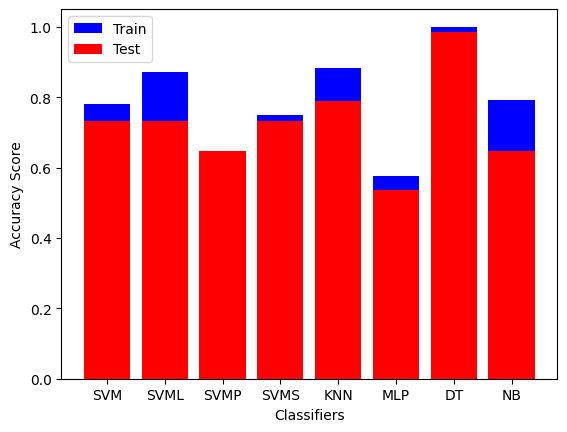

In [97]:
#graph for the all classifiers used
graph = [['SVM',clf1_train,clf1_test],
         ['SVML',clf2_train,clf2_test],
         ['SVMP',clf3_train,clf3_test],
         ['SVMS',clf4_train,clf4_test],
         ['KNN',clf5_train,clf5_test],
         ['MLP',clf6_train,clf6_test],
         ['DT',clf7_train,clf7_test],
         ['NB',clf8_train,clf8_test]]
         
        
        
graph = pd.DataFrame(graph)
print(graph)
plt.bar(graph[0], graph[1], label = 'Train',color='blue')
plt.bar(graph[0], graph[2], label = 'Test',color='red')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

       0         1         2         3
0     LR  0.252036 -0.795455  0.441651
1    LOR  0.766871  0.704225  0.295775
2     RF  0.997221  0.897405  0.025237
3     BR  0.998031  0.869452  0.032113
4    BRR  0.097422 -0.038915  0.255555
5    KRR  0.162148 -0.131500  0.278330
6    XGR  1.000000  0.942750  0.014082
7  Lasso  0.097397 -0.033828  0.254304


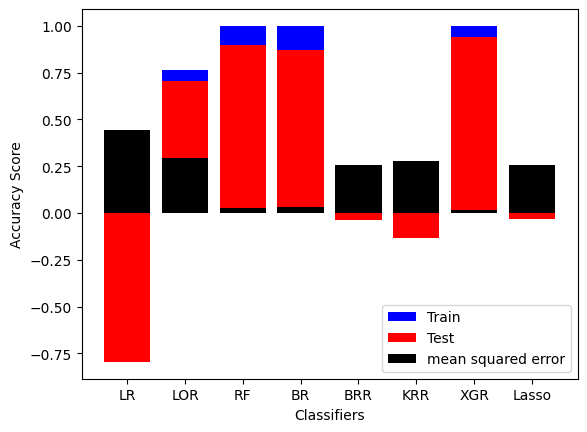

In [113]:
#graph for all the regressors used
graph1 = [['LR',clf9_train,clf9_test,a],
          ['LOR',clf10_train,clf10_test,b],
          #['SGD', clf11_train,clf11_test,c],
          ['RF',clf12_train,clf12_test,d],
          ['BR',clf14_train,clf14_test,e],
          ['BRR',clf15_train,clf15_test,f],
          #['CBR',clf16_train,clf16_test,g]#,
          ['KRR',clf17_train,clf17_test,h],
          ['XGR',clf18_train,clf18_test,i],
          ['Lasso',clf19_train,clf19_test,k]]
graph1 = pd.DataFrame(graph1)
print(graph1)
plt.bar(graph1[0], graph1[1], label = 'Train',color='blue')
plt.bar(graph1[0], graph1[2], label = 'Test',color='red')
plt.bar(graph1[0], graph1[3], label = 'mean squared error', color = 'black')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import missingno as msngo
import seaborn as sns
from wordcloud import WordCloud
from ipyvizzu import Chart, Data, Config, Style
from sklearn.cluster import KMeans

In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.io as pio

In [3]:
population_data = pd.read_csv('world_population.csv')

In [4]:
population_data.rename(columns={'Country/Territory':'Country'}, inplace = True)

In [5]:
for col in population_data.columns:
    if 'Population' and '0' in col:
        population_data = population_data.rename(columns={col: col.split(' ')[0]})
        
population_data.head(3)

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


In [6]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022                         234 non-null    int64  
 6   2020                         234 non-null    int64  
 7   2015                         234 non-null    int64  
 8   2010                         234 non-null    int64  
 9   2000                         234 non-null    int64  
 10  1990                         234 non-null    int64  
 11  1980                         234 non-null    int64  
 12  1970                         234 non-null    int64  
 13  Area (km²)          

In [7]:
country_population_data = population_data.groupby(by='Country').sum()
country_population_data.head(3)

,Rank,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Country,,,,,,,,,,,,,
Afghanistan,36,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
Albania,138,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
Algeria,34,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


In [8]:
population_data.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022                           234
2020                           234
2015                           234
2010                           234
2000                           234
1990                           234
1980                           234
1970                           234
Area (km²)                     233
Density (per km²)              234
Growth Rate                    180
World Population Percentage     70
dtype: int64

In [9]:

population_data.columns = list(map(str, population_data.columns))

In [10]:
years = list(map(str, (1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022)))
years

['1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022']

In [11]:

population_data_copy = population_data.copy()
population_data_copy = population_data_copy.sort_values(by = 'Rank', ascending=True)
population_data_copy.columns = ['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022', '2020', '2015',
       '2010', '2000', '1990',
       '1980', '1970', 'Area (km²)', 'Density (per km²)',
'Growth Rate', 'World Population Percentage']
population_data_copy.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96


In [12]:
print('Shape of our data is:', population_data_copy.shape)

Shape of our data is: (234, 17)


In [13]:
population_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 41 to 226
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022                         234 non-null    int64  
 6   2020                         234 non-null    int64  
 7   2015                         234 non-null    int64  
 8   2010                         234 non-null    int64  
 9   2000                         234 non-null    int64  
 10  1990                         234 non-null    int64  
 11  1980                         234 non-null    int64  
 12  1970                         234 non-null    int64  
 13  Area (km²)         

DATA VISUALISATION


In [14]:
def plottting(population_data):
    for i in range(len(population_data.index)):
        country = population_data.iloc[i][5:13].sort_values()
        name = population_data.iloc[i][2]
        growth_rate = population_data.iloc[i][15]
        fig = plt.figure(figsize = (10, 5))
        ax = sns.barplot(x = country.index, y = country,  palette = 'bright')
        
        plt.title(str(name)+' Population by Years (millions)')
        plt.xlabel('Years')
        plt.ylabel('Population')
        plt.show()

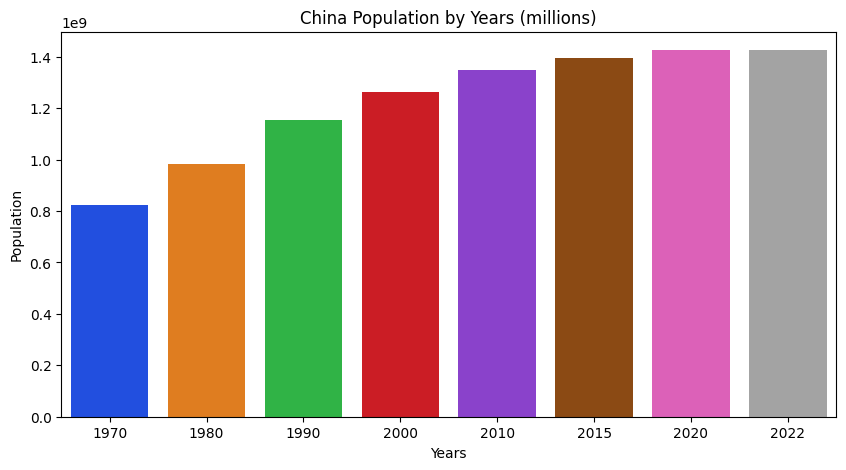

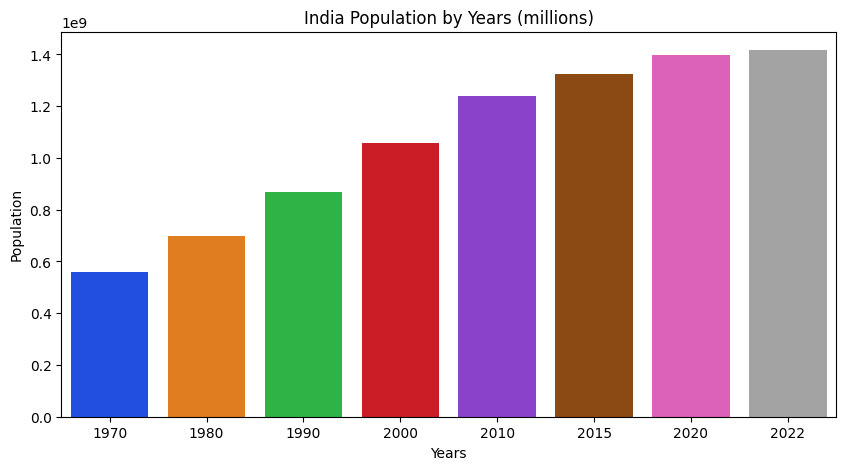

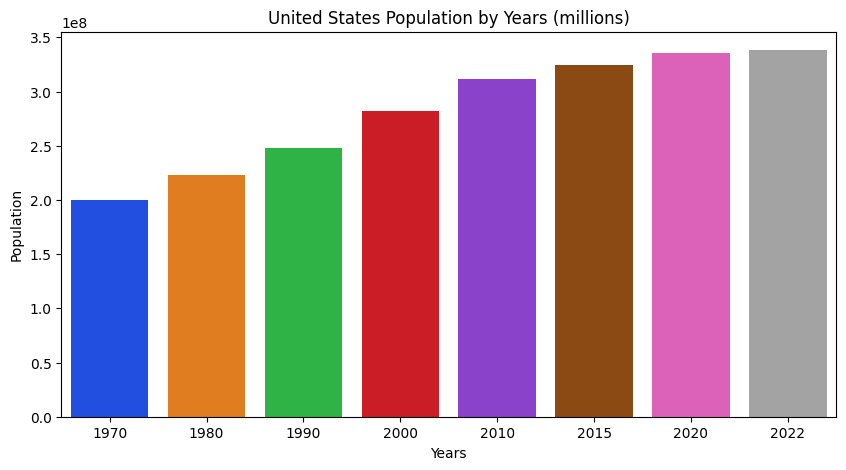

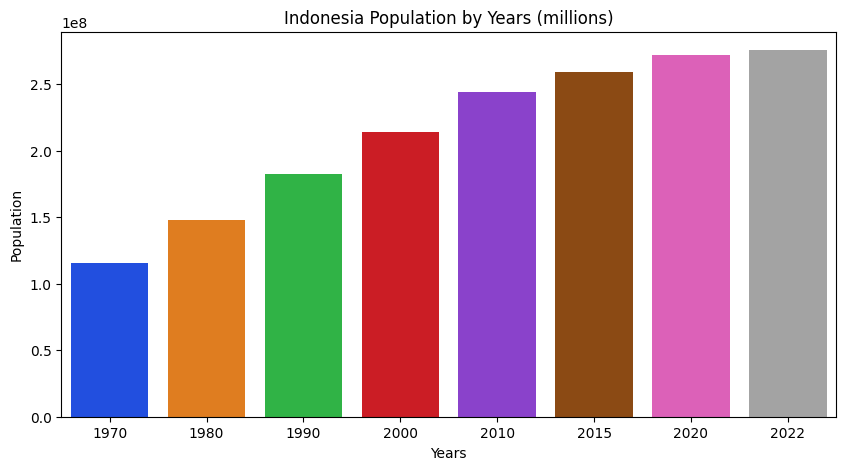

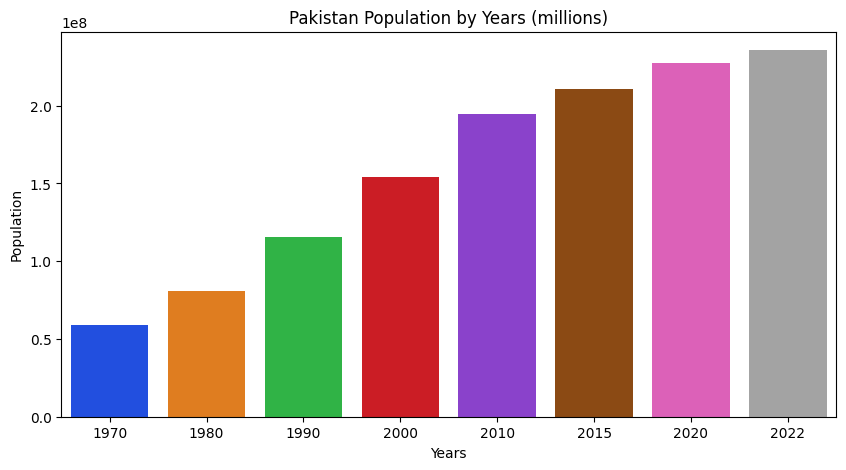

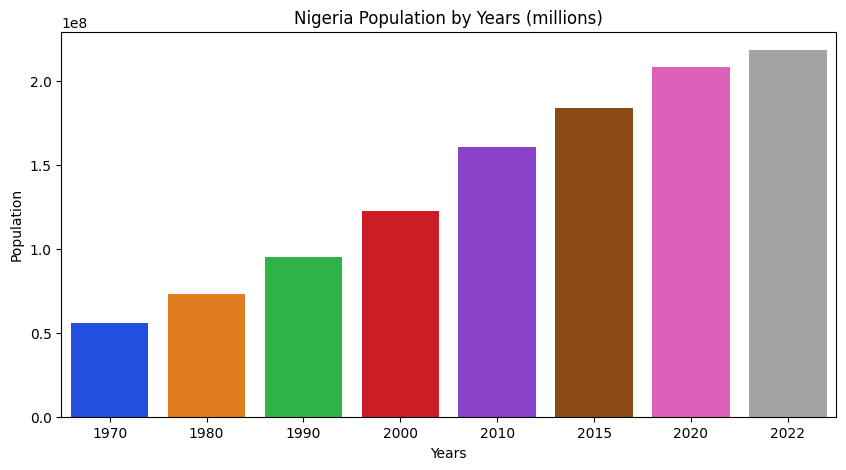

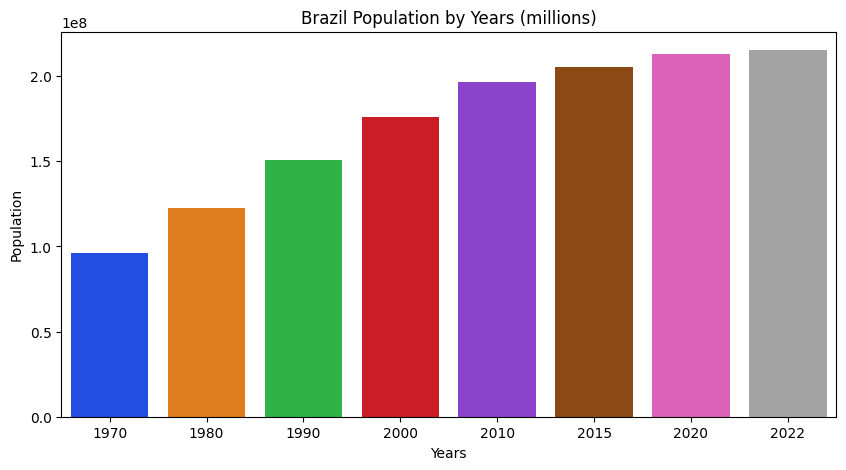

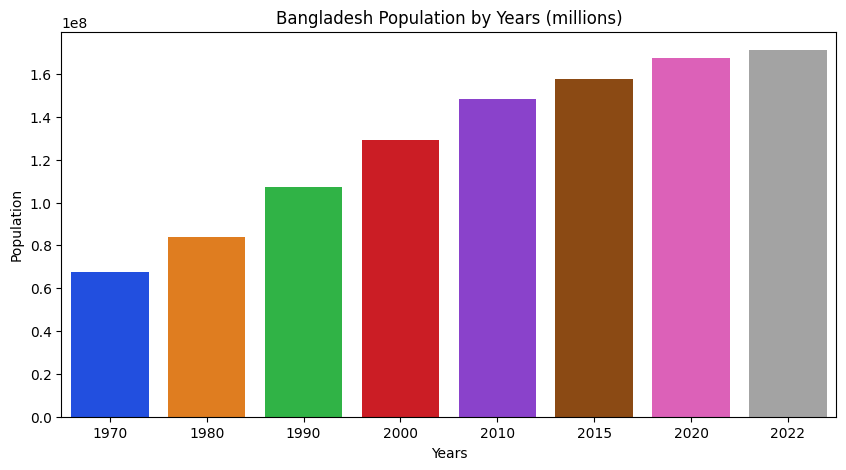

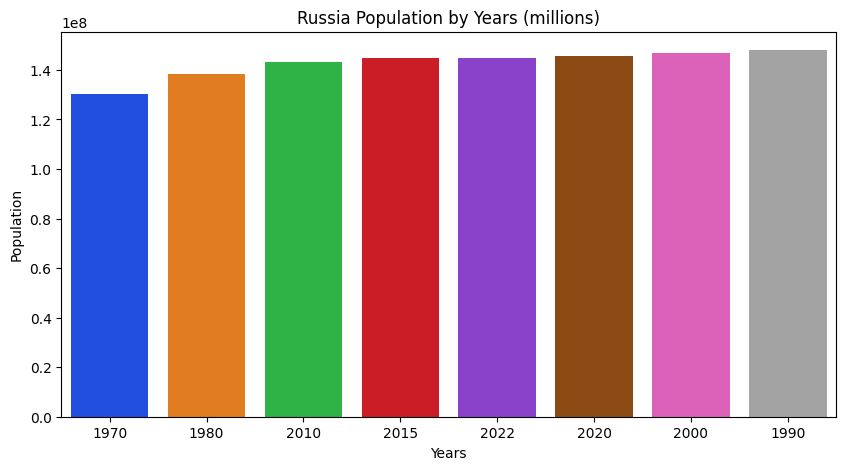

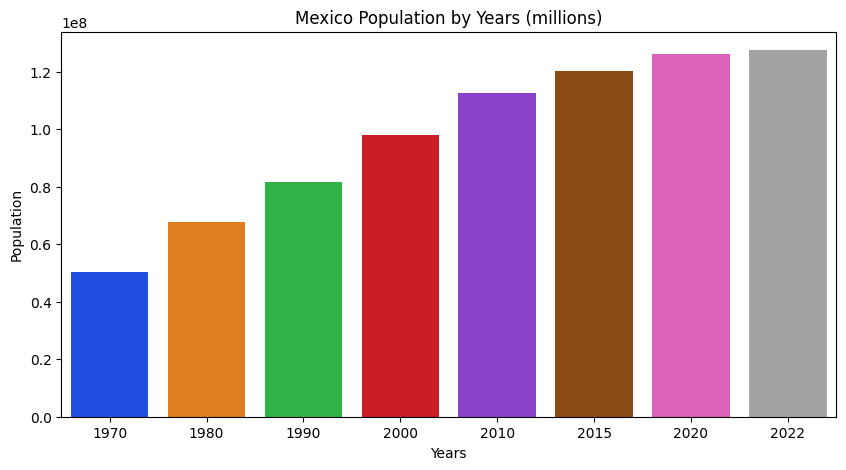

In [15]:
plottting(population_data_copy.head(10))

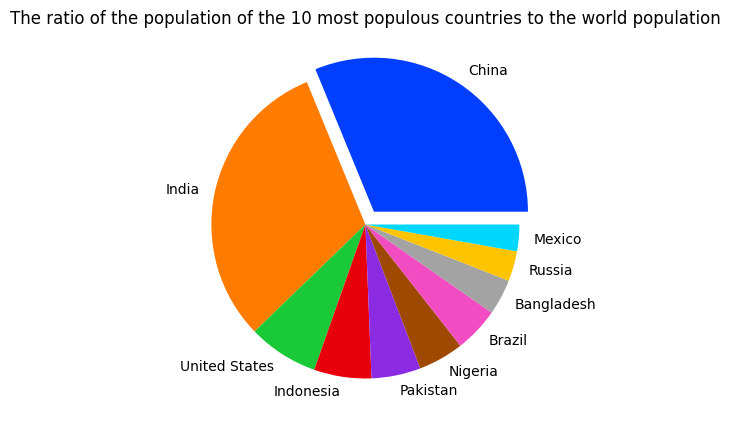

In [16]:
palette_color = sns.color_palette('bright')
fig = plt.figure(figsize = (7,5))
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ax = plt.pie(population_data_copy['World Population Percentage'][:10], labels = population_data_copy['Country/Territory'][:10], colors=palette_color, explode=explode)
plt.xticks(rotation=45)
plt.title('The ratio of the population of the 10 most populous countries to the world population')
plt.show()

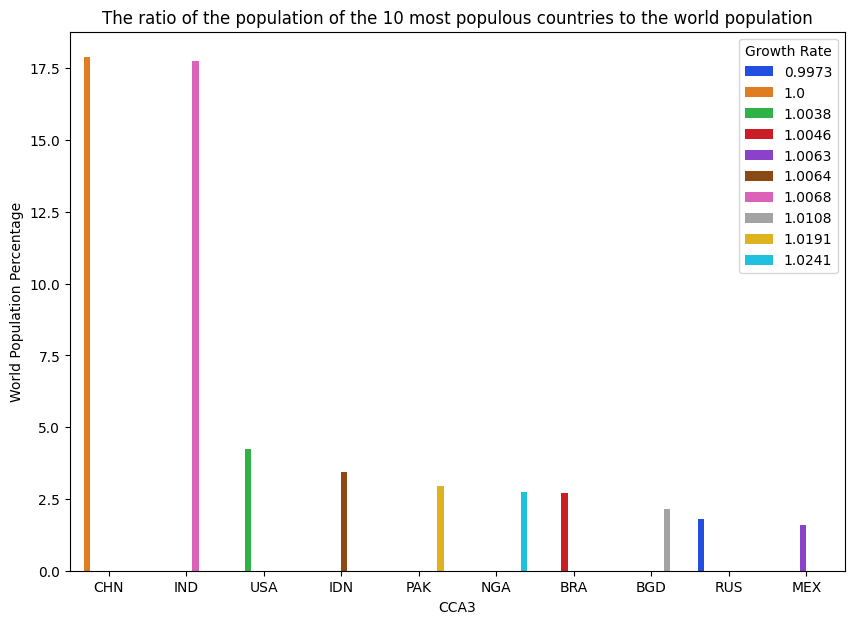

In [17]:
fig = plt.figure(figsize = (10,7))
ax = sns.barplot(x = population_data_copy['CCA3'][:10], y = population_data_copy['World Population Percentage'][:10], palette = 'bright', hue = population_data_copy['Growth Rate'][:10])

#plt.xticks(rotation=0)
plt.title('The ratio of the population of the 10 most populous countries to the world population')
plt.show()

In [18]:
population_data_copy[:10].sort_values(['Density (per km²)'])
population_data

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


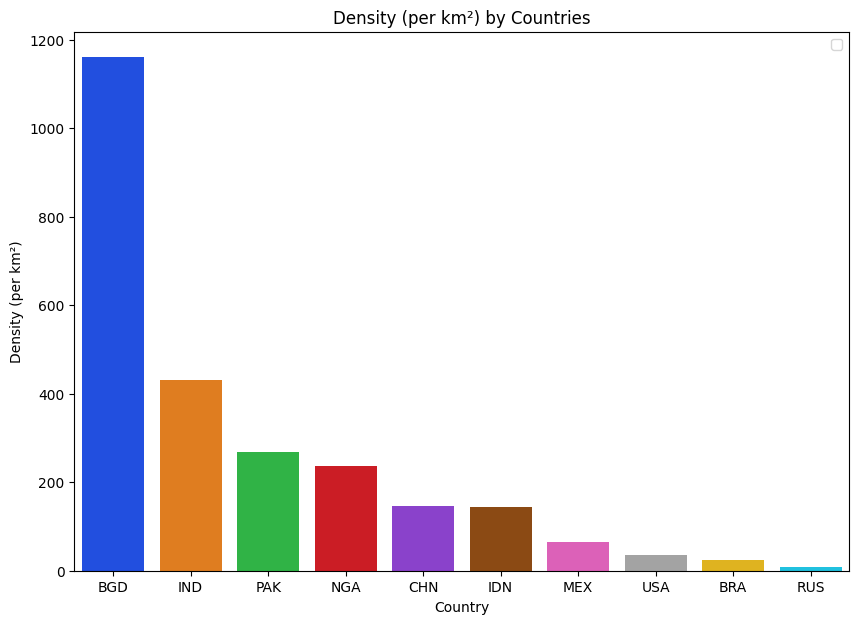

In [19]:
destiny = population_data_copy[:10].sort_values(['Density (per km²)'], ascending = False)
fig = plt.figure(figsize = (10,7))
ax = sns.barplot(x = destiny['CCA3'] , y = destiny['Density (per km²)'], 
            palette = 'bright')

plt.title('Density (per km²) by Countries')
plt.xlabel('Country')
plt.legend()
plt.show()

In [20]:
for col in population_data.columns:
    if 'Population' and '0' in col:
        population_data = population_data.rename(columns={col: col.split(' ')[0]})
        
population_data.head()

,Rank,CCA3,Country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [21]:
population_data.drop(columns=['CCA3','Capital'],inplace=True)

data visualization

In [22]:
i=[False,True]
for x in i :
    title="Top 10 Smallest Country" if(x) else "Top 10 Biggest Country"
    top_most_population = population_data.groupby(by = 'Country')['2022'].sum().sort_values(ascending=x).head(10)
    fig=px.bar(x=top_most_population.index,
            y=top_most_population.values,
            color=top_most_population.index,
            color_discrete_sequence=px.colors.qualitative.Safe,
            text=top_most_population.values,
            title=title,
            template= 'plotly_white')
    fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",)
    fig.show()

In [23]:
cont_data_percentage = population_data.groupby('Continent')['World Population Percentage'].sum().round(1).sort_values(ascending= False).reset_index()
cont_data_percentage

,Continent,World Population Percentage
0,Asia,59.2
1,Africa,17.9
2,Europe,9.3
3,North America,7.5
4,South America,5.5
5,Oceania,0.6


In [24]:
labels= cont_data_percentage['Continent']
labels

0             Asia
1           Africa
2           Europe
3    North America
4    South America
5          Oceania
Name: Continent, dtype: object

In [25]:
pp = cont_data_percentage['World Population Percentage']
pp

0    59.2
1    17.9
2     9.3
3     7.5
4     5.5
5     0.6
Name: World Population Percentage, dtype: float64

Text(0.5, 1.0, 'Continent - Population%')

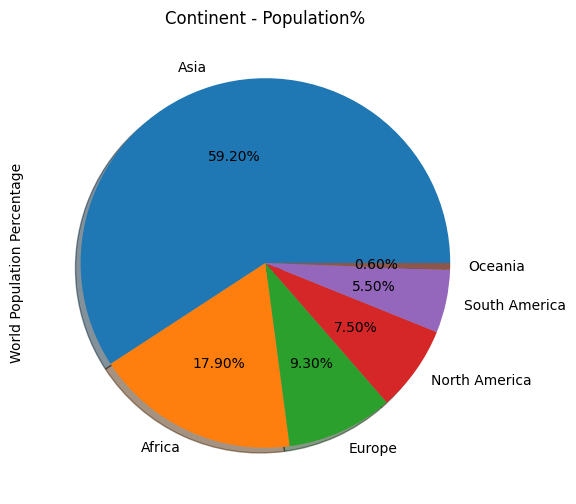

In [26]:
pp.plot.pie(labels= labels, autopct = '%1.2f%%', figsize= (12,6),shadow = True)
plt.title('Continent - Population%')

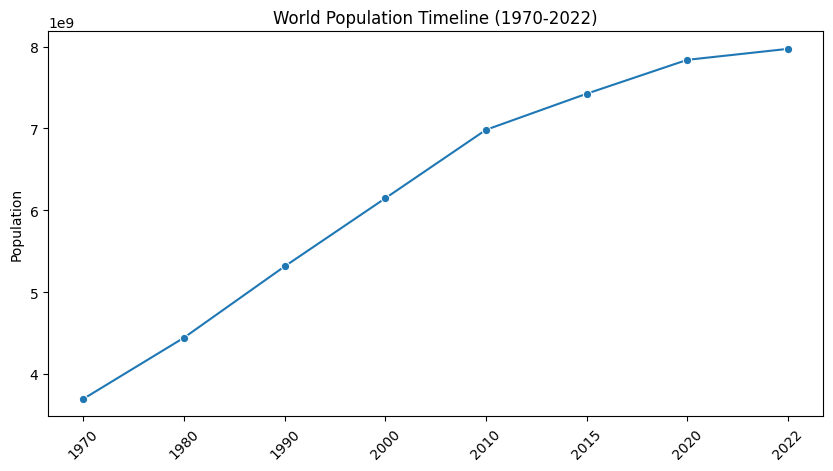

In [27]:
plt.subplots(figsize=(10,5))
growth = population_data.iloc[:,3:11].sum()[::-1]
sns.lineplot(x=growth.index, y=growth.values, marker="o")
plt.xticks(rotation=45)
plt.ylabel("Population")
plt.title("World Population Timeline (1970-2022)")
plt.show()

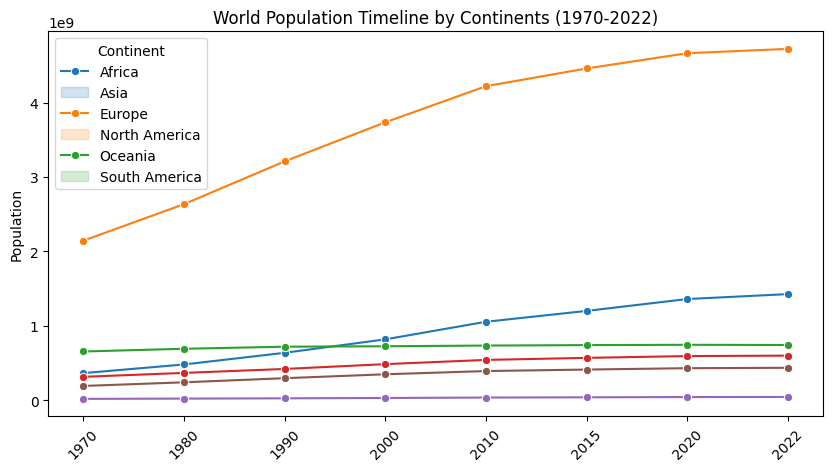

In [28]:
# Number of population timeline by continent

# Get total population of each continent
continent_pop = population_data.copy()
continent_pop = continent_pop.groupby("Continent").sum().iloc[:,1:9] # get 1970-2022 column
continent_pop = continent_pop.iloc[:,::-1] # reverse column

# Create line plots
plt.subplots(figsize=(10,5))
for continent in continent_pop.index:
    sns.lineplot(x=continent_pop.T.index, y=continent_pop.T[continent], marker="o")
plt.xticks(rotation=45)
plt.ylabel("Population")
plt.title("World Population Timeline by Continents (1970-2022)")
plt.legend(continent_pop.index, title="Continent")
plt.show()

In [29]:
population_data_copy = population_data.copy()
population_data_copy.head(3)

,Rank,Country,Continent,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56


In [30]:
population_data_copy.set_index('Country', inplace=True)

In [31]:
population_data_copy.sort_values(by='2022', ascending=True, inplace=True)

population_data_top10 = population_data_copy['2022'].tail(10)
population_data_top10

Country
Mexico            127504125
Russia            144713314
Bangladesh        171186372
Brazil            215313498
Nigeria           218541212
Pakistan          235824862
Indonesia         275501339
United States     338289857
India            1417173173
China            1425887337
Name: 2022, dtype: int64

In [32]:
# let's compare China and India population
# creating dataframe for both countries
population_data_CI = population_data_copy.loc[['China', 'India'], years]
population_data_CI

,1970,1980,1990,2000,2010,2015,2020,2022
Country,,,,,,,,
China,822534450,982372466,1153704252,1264099069,1348191368,1393715448,1424929781,1425887337
India,557501301,696828385,870452165,1059633675,1240613620,1322866505,1396387127,1417173173


In [33]:
population_data_CI = population_data_CI.transpose()
population_data_CI.head()

Country,China,India
1970,822534450,557501301
1980,982372466,696828385
1990,1153704252,870452165
2000,1264099069,1059633675
2010,1348191368,1240613620


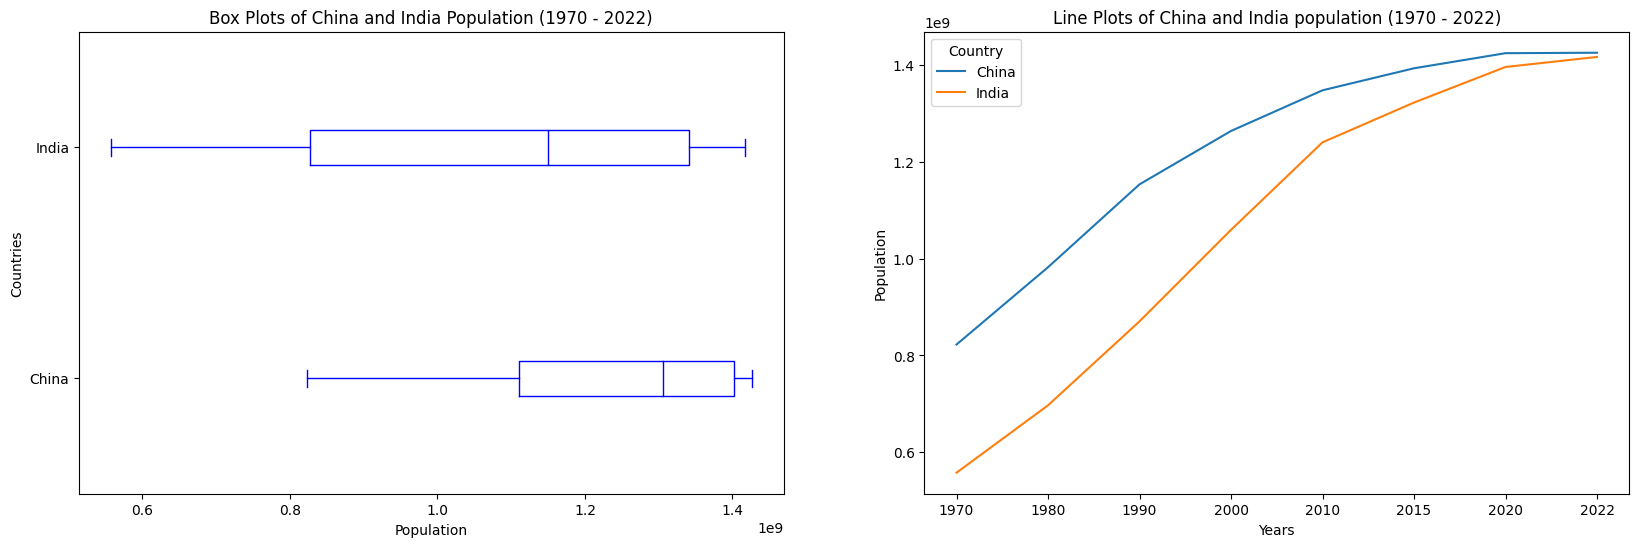

In [34]:
fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

# Subplot 1: Box plot
population_data_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) 
ax0.set_title('Box Plots of China and India Population (1970 - 2022)')
ax0.set_xlabel('Population')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
population_data_CI.plot(kind='line', figsize=(20, 6), ax=ax1) 
ax1.set_title ('Line Plots of China and India population (1970 - 2022)')
ax1.set_ylabel('Population')
ax1.set_xlabel('Years')

plt.show()

Data Normalization

In [35]:
population_data_norm = population_data_copy[years].transpose() # transposed dataframe

population_data_norm.index = map(int, population_data_norm.index) # cast the Years (the index) to type int
population_data_norm.index.name = 'Year'
population_data_norm.reset_index(inplace=True) # reset index to bring the Year in as a column
population_data_norm.head(3)

Country,Year,Vatican City,Tokelau,Niue,Falkland Islands,Montserrat,Saint Pierre and Miquelon,Saint Barthelemy,Tuvalu,Wallis and Futuna,...,Mexico,Russia,Bangladesh,Brazil,Nigeria,Pakistan,Indonesia,United States,India,China
0,1970,752,1714,5185,2274,11402,5537,2417,5814,9377,...,50289306,130093010,67541860,96369875,55569264,59290872,115228394,200328340,557501301,822534450
1,1980,733,1647,3637,2240,11452,6106,2983,7731,11315,...,67705186,138257420,83929765,122288383,72951439,80624057,148177096,223140018,696828385,982372466
2,1990,700,1669,2533,2332,10805,6324,5168,9182,13454,...,81720428,148005704,107147651,150706446,95214257,115414069,182159874,248083732,870452165,1153704252


In [36]:
# normalize China data
norm_china = (population_data_norm['China'] - population_data_norm['China'].min()) / (population_data_norm['China'].max() - population_data_norm['China'].min())

# normalize India data
norm_india = (population_data_norm['India'] - population_data_norm['India'].min()) / (population_data_norm['India'].max() - population_data_norm['India'].min())

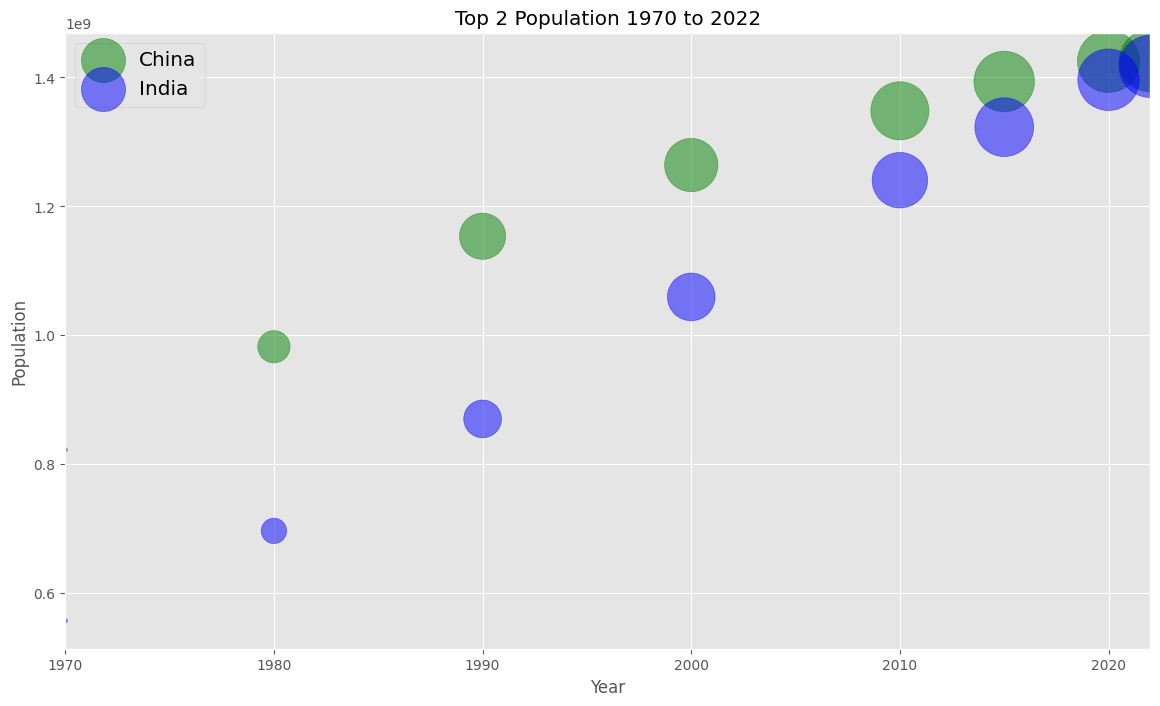

In [37]:
# plotting the graph for normalized China - India

import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib as mpl
mpl.style.use(['ggplot'])

# China
ax0 = population_data_norm.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1970, 2022)
                    )

# India
ax1 = population_data_norm.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Population')
ax0.set_title('Top 2 Population 1970 to 2022')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

<AxesSubplot:>

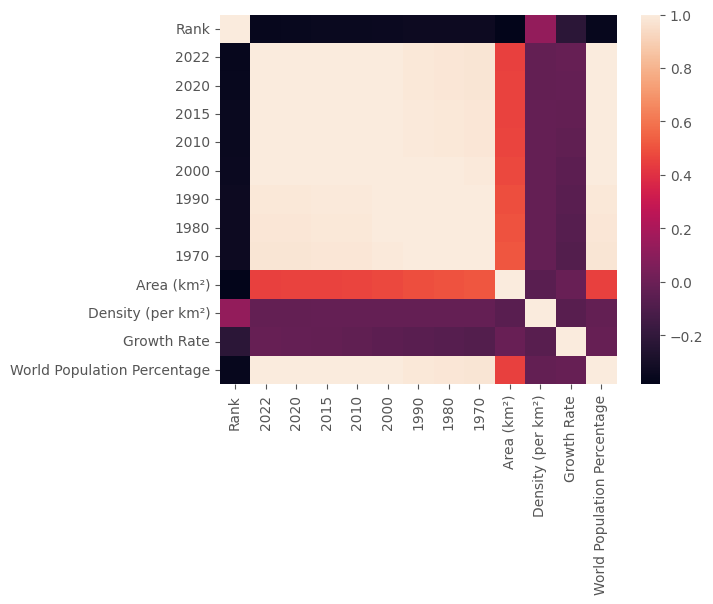

In [38]:
#heat map
correlation = population_data.corr()
sns.heatmap(correlation)

<AxesSubplot:>

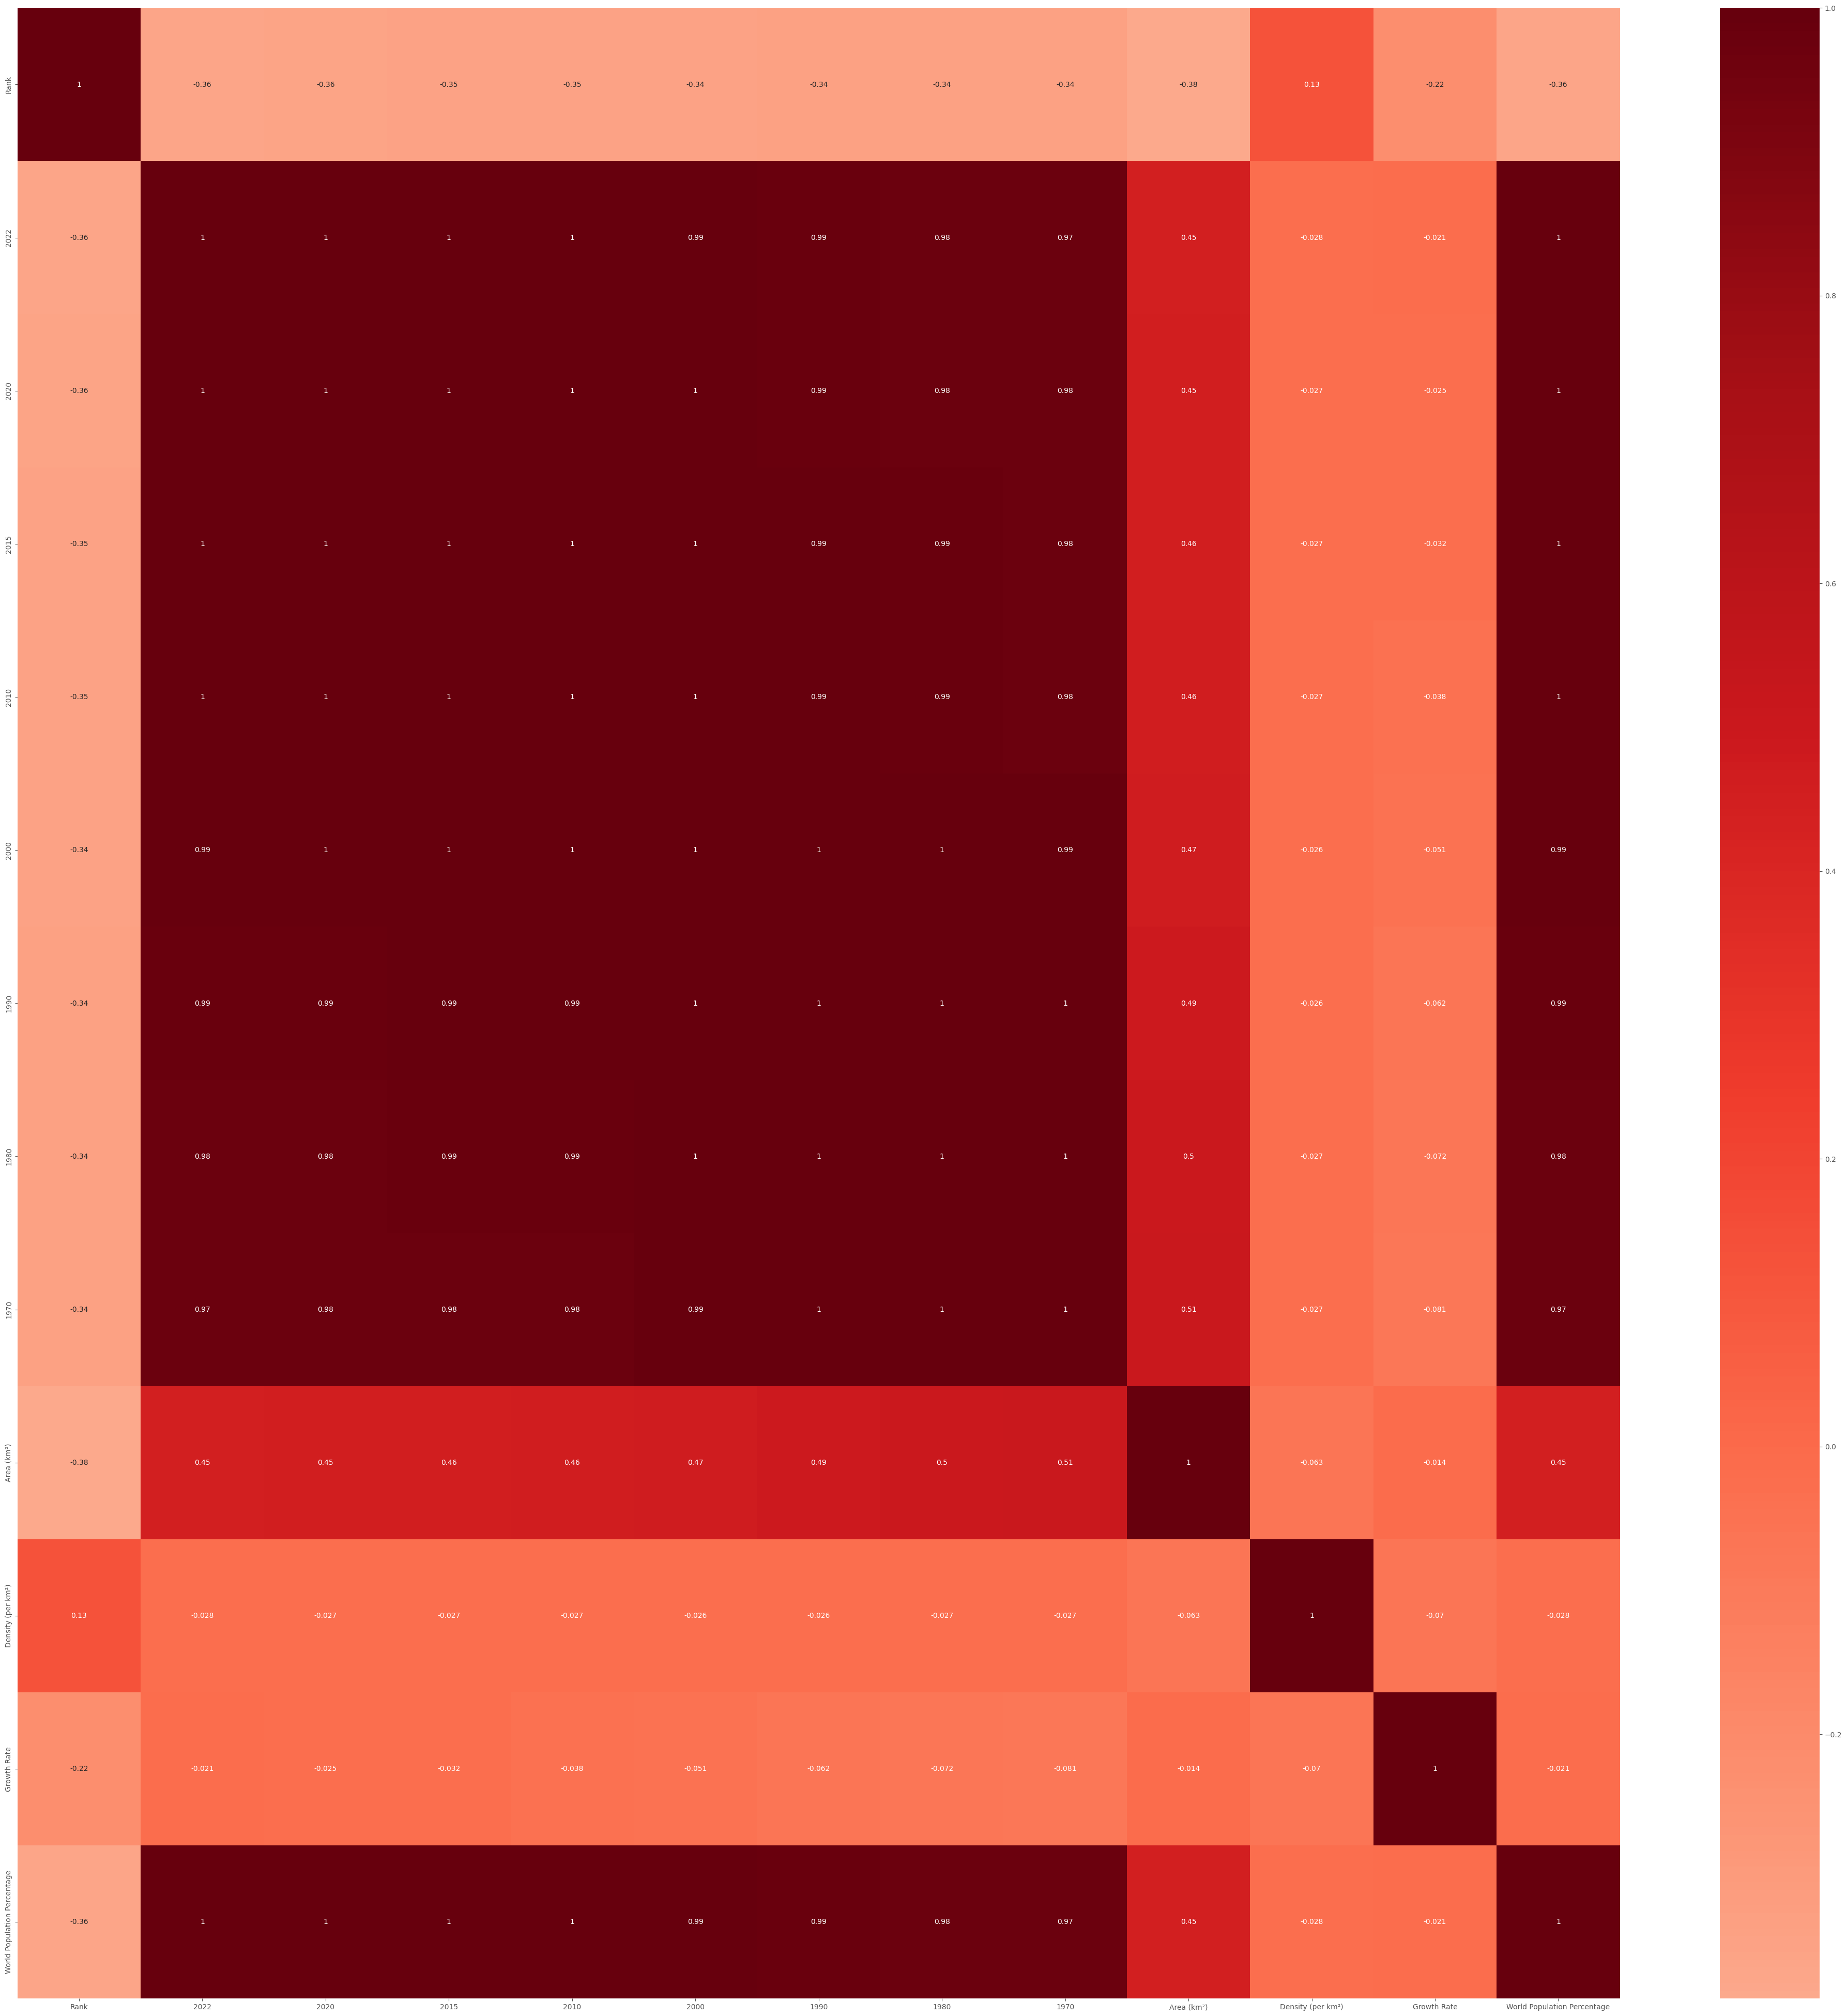

In [39]:
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(population_data.corr(), center=0, cmap='Reds', annot=True)

In [40]:
# creating dataframes for countries per continent

# Asia
asian_countries = population_data.loc[population_data["Continent"]=="Asia"].sort_values(by=["2022"], ascending=False, ignore_index=True)

# Africa
african_countries = population_data.loc[population_data["Continent"]=="Africa"].sort_values(by=["2022"], ascending=False, ignore_index=True)

# Europe
european_countries = population_data.loc[population_data["Continent"]=="Europe"].sort_values(by=["2022"], ascending=False, ignore_index=True)

# North America
na_countries = population_data.loc[population_data["Continent"]=="North America"].sort_values(by=["2022"], ascending=False, ignore_index=True)

# Oceania
oc_countries = population_data.loc[population_data["Continent"]=="Oceania"].sort_values(by=["2022"], ascending=False, ignore_index=True)

# South America
sa_countries = population_data.loc[population_data["Continent"]=="South America"].sort_values(by=["2022"], ascending=False, ignore_index=True)

**population projection**

In [41]:
population_data['2022'].sum()

7973413042

In [42]:
# relationship betewen years and total population, we will convert years to int type.

population_data_tot = pd.DataFrame(population_data[years].sum(axis=0)) # use the sum() method to get the total population per year

population_data_tot.index = map(int, population_data_tot.index) # change the years to type int (useful for regression later on)

population_data_tot.reset_index(inplace = True) # reset the index to put in back in as a column in the population_data_tot dataframe

population_data_tot.columns = ['year', 'total'] # rename columns

population_data_tot.head()

,year,total
0,1970,3694136661
1,1980,4442400371
2,1990,5314191665
3,2000,6147055703
4,2010,6983784998


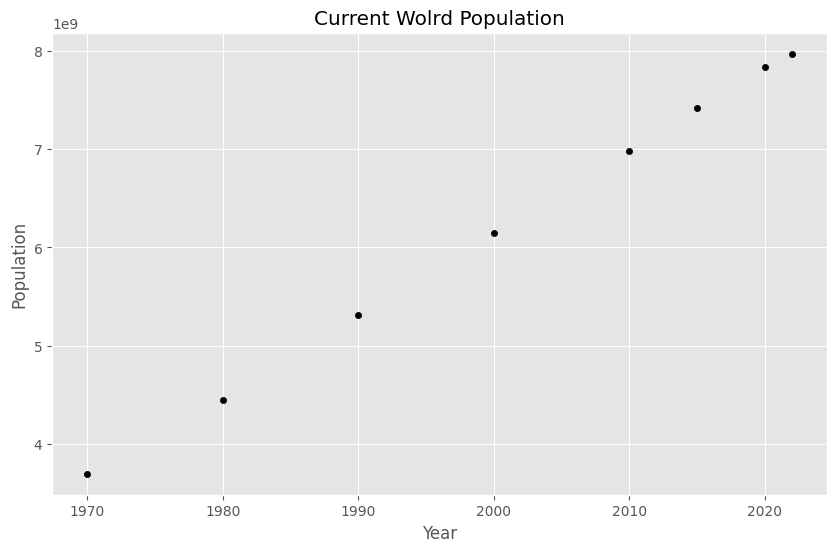

In [43]:
# plotting a scatter plot for year vs total population

population_data_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('Current Wolrd Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

In [44]:
# fitting our data

x = population_data_tot['year']      
y = population_data_tot['total']    
fit = np.polyfit(x, y, deg=1)

fit

array([ 8.33710451e+07, -1.60587660e+11])

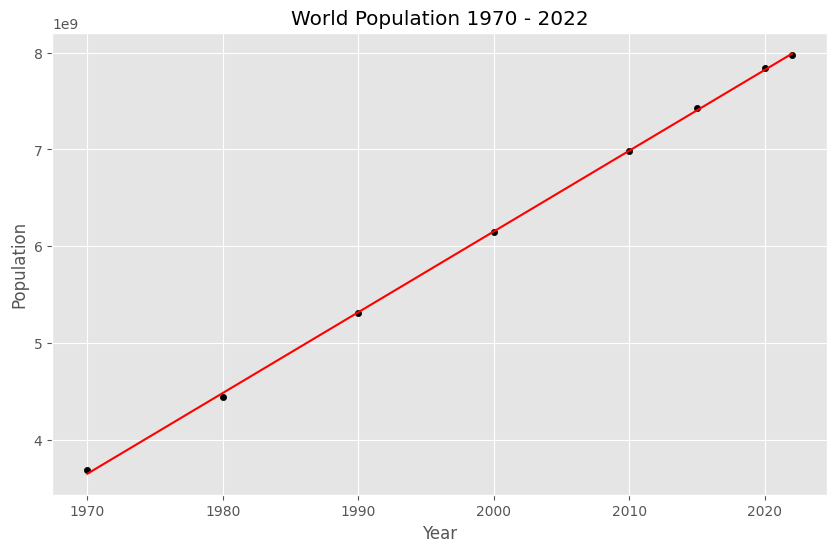

'World Population = 83371045 * Year + -160587659522'

In [45]:
# plotting the regression line on the scatter plot

population_data_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('World Population 1970 - 2022')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'World Population = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [46]:
year = int(input("Enter the year that you wanted to predict the population:"))
for i in range(year):
    World_Population = 83371045 * year + -160587659522
print("The population of the world in year",year,'is:', World_Population)

The population of the world in year 2023 is: 8071964513


In [47]:
# current asia population

asian_countries['2022'].sum()

4721383274

In [48]:
population_data_a230 = population_data[(population_data['Continent'] == 'Asia')] 

# relationship betewen years and total asia population, we will convert years to int type.

population_data_asia_tot = pd.DataFrame(population_data_a230[years].sum(axis=0)) 

population_data_asia_tot.index = map(int, population_data_asia_tot.index) 

population_data_asia_tot.reset_index(inplace = True) 

population_data_asia_tot.columns = ['year', 'total']

population_data_asia_tot.tail()

,year,total
3,2000,3735089604
4,2010,4220041327
5,2015,4458250182
6,2020,4663086535
7,2022,4721383274


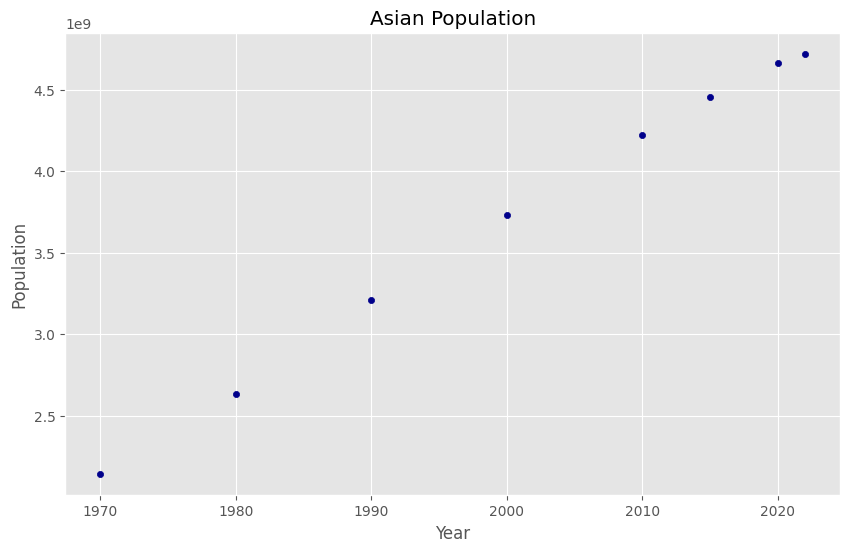

In [49]:
population_data_asia_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Asian Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

In [50]:
# fitting asian data

x_as = population_data_asia_tot['year']      
y_as = population_data_asia_tot['total']    
fit_as = np.polyfit(x_as, y_as, deg=1)

fit_as

array([ 5.03219504e+07, -9.69643506e+10])

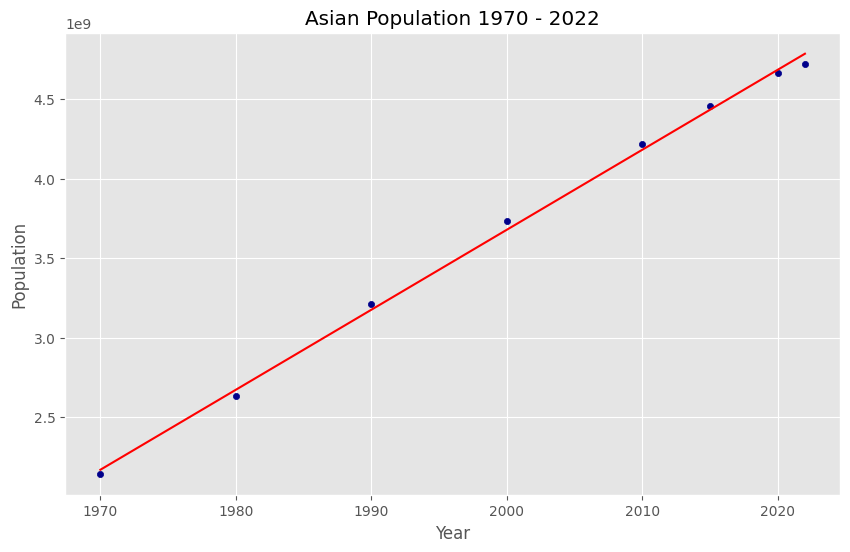

'Asian Population = 50321950 * Year + -96964350561'

In [51]:
# plotting Asian Populaion regression line on the scatter plot

population_data_asia_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Asian Population 1970 - 2022')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x_as, fit_as[0] * x_as + fit_as[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit_as[0], fit_as[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'Asian Population = {0:.0f} * Year + {1:.0f}'.format(fit_as[0], fit_as[1])

In [52]:
african_countries['2022'].sum()

1426730932

In [53]:
population_data_af230 = population_data[(population_data['Continent'] == 'Africa')] 

# relationship betewen years and total asia population, we will convert years to int type.

population_data_afri_tot = pd.DataFrame(population_data_af230[years].sum(axis=0)) 

population_data_afri_tot.index = map(int, population_data_afri_tot.index) 

population_data_afri_tot.reset_index(inplace = True) 

population_data_afri_tot.columns = ['year', 'total']

population_data_afri_tot.tail()

,year,total
3,2000,818946032
4,2010,1055228072
5,2015,1201102442
6,2020,1360671810
7,2022,1426730932


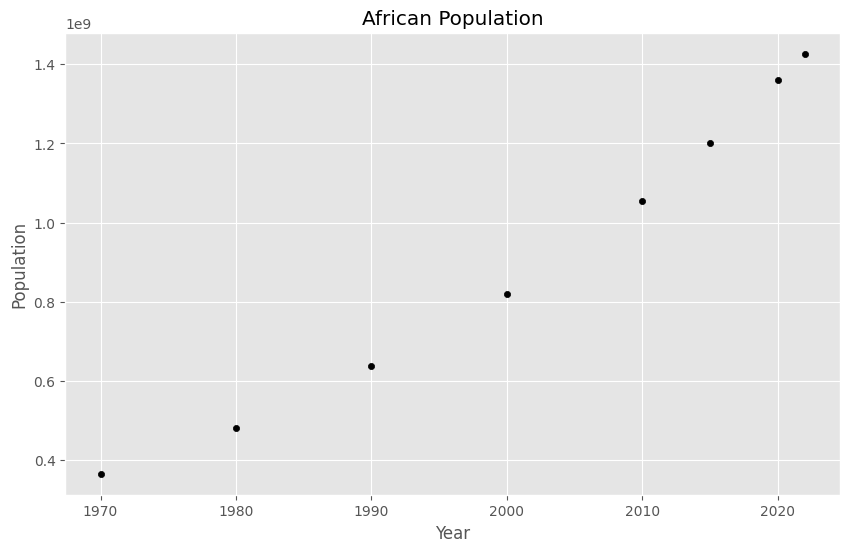

In [54]:
population_data_afri_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('African Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

In [55]:
# fitting african data

x_af = population_data_afri_tot['year']      
y_af = population_data_afri_tot['total']    
fit_af = np.polyfit(x_af, y_af, deg=1)

fit_af

array([ 2.06561727e+07, -4.04119432e+10])

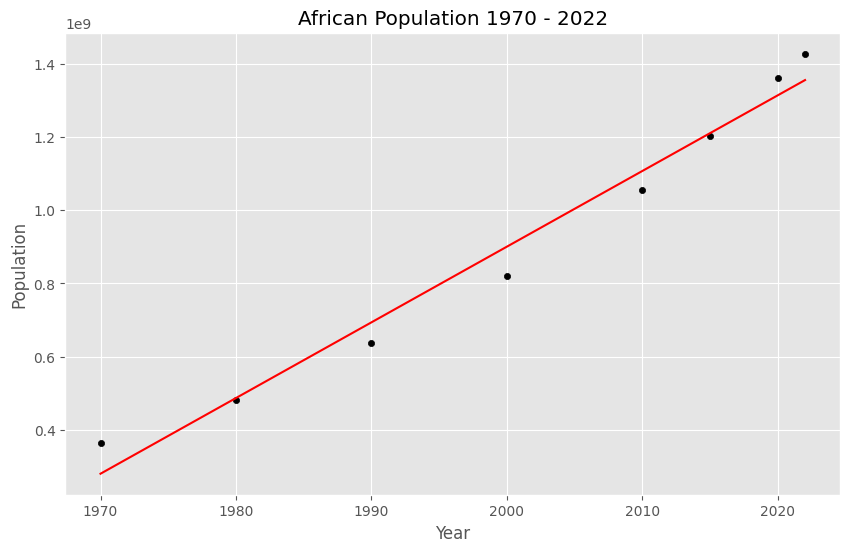

'African Population = 20656173 * Year + -40411943187'

In [56]:
# plotting African Populaion regression line on the scatter plot

population_data_afri_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('African Population 1970 - 2022')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x_af, fit_af[0] * x_af + fit_af[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit_af[0], fit_af[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'African Population = {0:.0f} * Year + {1:.0f}'.format(fit_af[0], fit_af[1]) 

In [57]:
#predicting african population
y_af = int(input("Enter the year you want to predict the african population"))
for i in range(y_af):
    African_Population = 20656173 *y_af + -40411943187
print("The African population in",y_af,'is:',African_Population)

The African population in 2023 is: 1375494792


In [58]:
european_countries['2022'].sum()

743147538

In [59]:
population_data_eu230 = population_data[(population_data['Continent'] == 'Europe')] 

# relationship betewen years and total asia population, we will convert years to int type.

population_data_eu_tot = pd.DataFrame(population_data_eu230[years].sum(axis=0)) 

population_data_eu_tot.index = map(int, population_data_eu_tot.index) 

population_data_eu_tot.reset_index(inplace = True) 

population_data_eu_tot.columns = ['year', 'total']

population_data_eu_tot.tail()

,year,total
3,2000,726093423
4,2010,735613934
5,2015,741535608
6,2020,745792196
7,2022,743147538


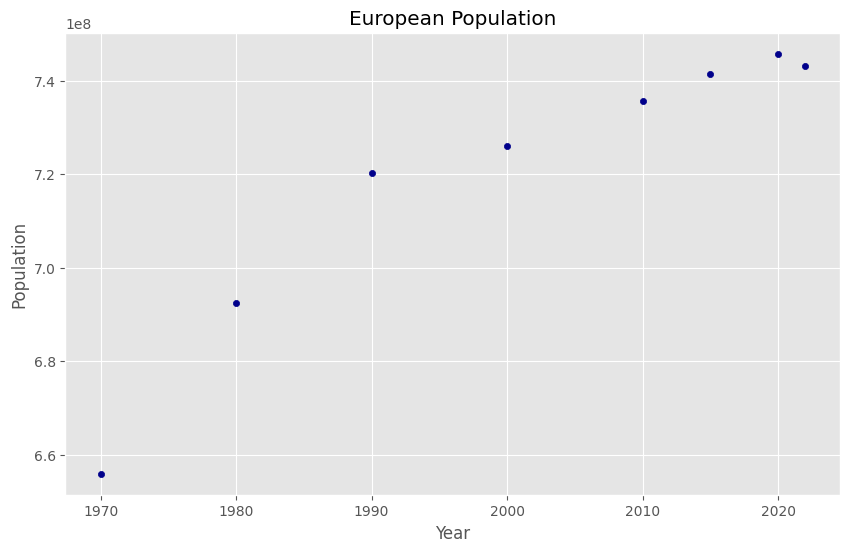

In [60]:
population_data_eu_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('European Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

In [61]:
# fitting european data

x_eu = population_data_eu_tot['year']      
y_eu = population_data_eu_tot['total']    
fit_eu = np.polyfit(x_eu, y_eu, deg=1)

fit_eu

array([ 1.52598839e+06, -2.33319268e+09])

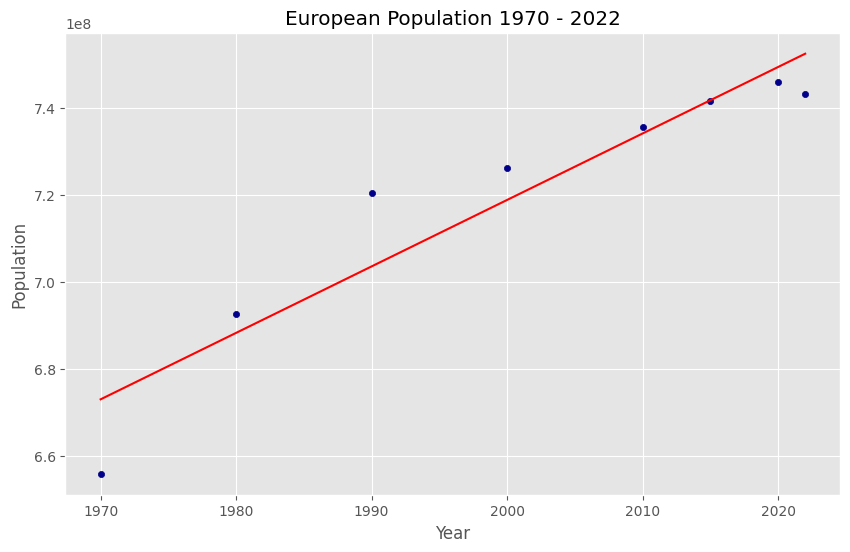

'European Population = 1525988 * Year + -2333192682'

In [62]:
# plotting European Populaion regression line on the scatter plot

population_data_eu_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('European Population 1970 - 2022')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x_eu, fit_eu[0] * x_eu + fit_eu[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit_eu[0], fit_eu[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'European Population = {0:.0f} * Year + {1:.0f}'.format(fit_eu[0], fit_eu[1]) 

In [63]:
y_eu = int(input("Enter the year you want to predict the population of Europe"))
for i in range(y_eu):
    European_Population = 1525988 * y_eu + -2333192682
print("The population of Europe in", y_eu,'is:',European_Population)

The population of Europe in 2023 is: 753881042


NA

In [64]:
na_countries['2022'].sum()

600296136

In [65]:
population_data_na230 = population_data[(population_data['Continent'] == 'North America')] 

# relationship betewen years and total asia population, we will convert years to int type.

population_data_na_tot = pd.DataFrame(population_data_na230[years].sum(axis=0)) 

population_data_na_tot.index = map(int, population_data_na_tot.index) 

population_data_na_tot.reset_index(inplace = True) 

population_data_na_tot.columns = ['year', 'total']

population_data_na_tot.tail()

,year,total
3,2000,486069584
4,2010,542720651
5,2015,570383850
6,2020,594236593
7,2022,600296136


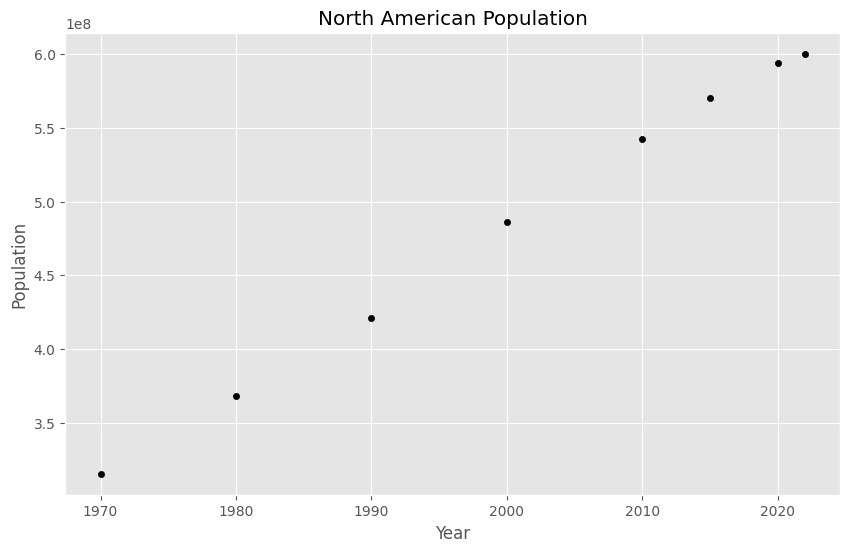

In [66]:
population_data_na_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('North American Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

In [67]:
# fitting north american data

x_na = population_data_na_tot['year']      
y_na = population_data_na_tot['total']    
fit_na = np.polyfit(x_na, y_na, deg=1)

fit_na

array([ 5.61735693e+06, -1.07522914e+10])

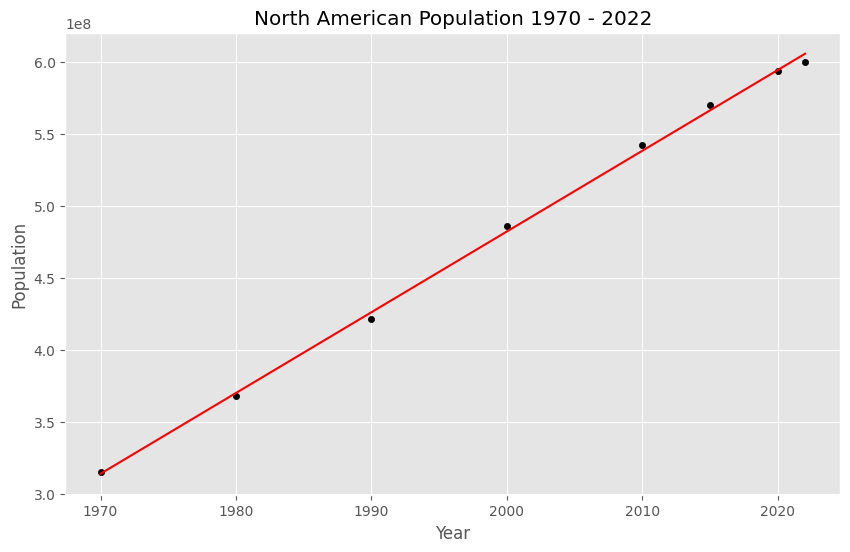

'North American Population = 5617357 * Year + -10752291387'

In [68]:
# plotting North American Populaion regression line on the scatter plot

population_data_na_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('North American Population 1970 - 2022')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x_na, fit_na[0] * x_na + fit_na[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit_na[0], fit_na[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'North American Population = {0:.0f} * Year + {1:.0f}'.format(fit_na[0], fit_na[1]) 

south american

In [69]:
# current south american population

sa_countries['2022'].sum()

436816608

In [70]:
population_data_sa230 = population_data[(population_data['Continent'] == 'South America')] 

# relationship betewen years and total asia population, we will convert years to int type.

population_data_sa_tot = pd.DataFrame(population_data_sa230[years].sum(axis=0)) 

population_data_sa_tot.index = map(int, population_data_sa_tot.index) 

population_data_sa_tot.reset_index(inplace = True) 

population_data_sa_tot.columns = ['year', 'total']

population_data_sa_tot.tail()

,year,total
3,2000,349634282
4,2010,393078250
5,2015,413134396
6,2020,431530043
7,2022,436816608


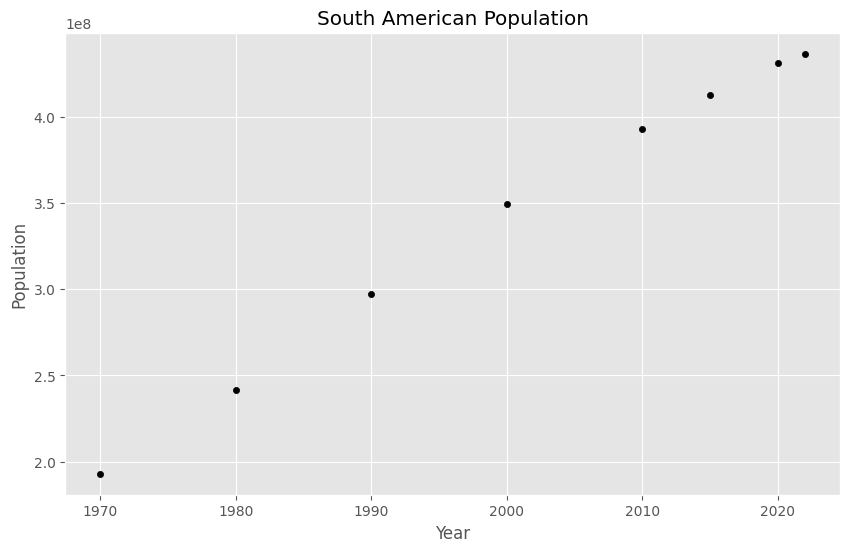

In [71]:
population_data_sa_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('South American Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

In [72]:
# fitting south america data

x_sa = population_data_sa_tot['year']      
y_sa = population_data_sa_tot['total']    
fit_sa = np.polyfit(x_sa, y_sa, deg=1)

fit_sa

array([ 4.74903293e+06, -9.15771175e+09])

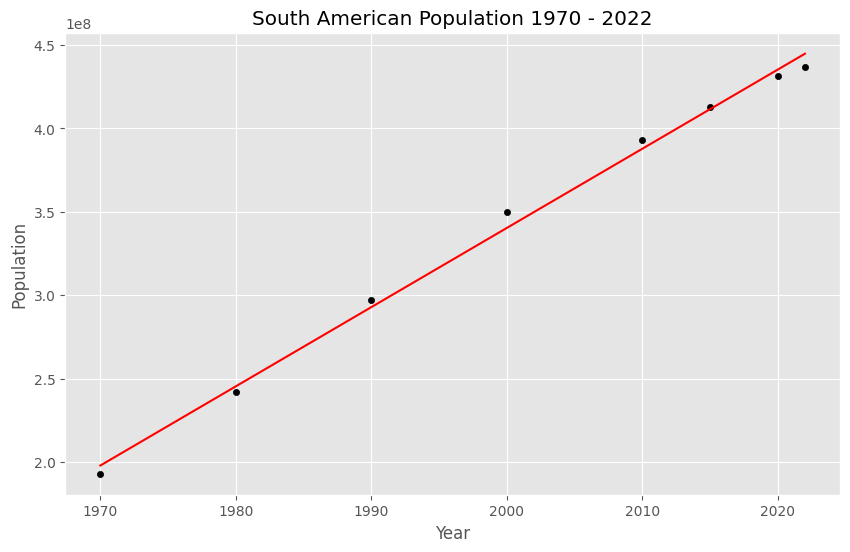

'South American Population = 4749033 * Year + -9157711746'

In [73]:
# plotting South American Populaion regression line on the scatter plot

population_data_sa_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='black')

plt.title('South American Population 1970 - 2022')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x_sa, fit_sa[0] * x_sa + fit_sa[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit_sa[0], fit_sa[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'South American Population = {0:.0f} * Year + {1:.0f}'.format(fit_sa[0], fit_sa[1]) 

In [74]:
# current oceania population

oc_countries['2022'].sum()

45038554

In [75]:
population_data_oc230 = population_data[(population_data['Continent'] == 'Oceania')] 

# relationship betewen years and total asia population, we will convert years to int type.

population_data_oc_tot = pd.DataFrame(population_data_oc230[years].sum(axis=0)) 

population_data_oc_tot.index = map(int, population_data_oc_tot.index) 

population_data_oc_tot.reset_index(inplace = True) 

population_data_oc_tot.columns = ['year', 'total']

population_data_oc_tot.tail()

,year,total
3,2000,31222778
4,2010,37102764
5,2015,40403283
6,2020,43933426
7,2022,45038554


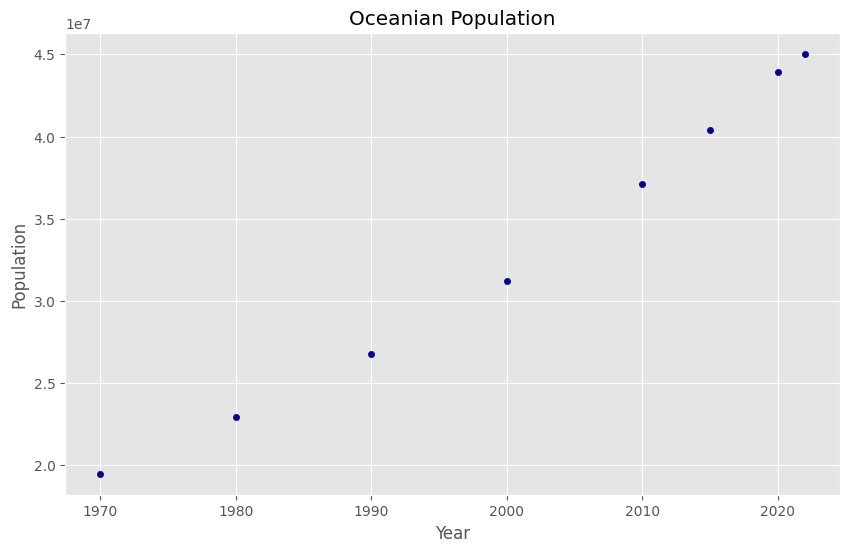

In [76]:
population_data_oc_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Oceanian Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

In [77]:
# fitting oceania data

x_oc = population_data_oc_tot['year']      
y_oc = population_data_oc_tot['total']    
fit_oc = np.polyfit(x_oc, y_oc, deg=1)

fit_oc

array([ 5.00543813e+05, -9.68169960e+08])

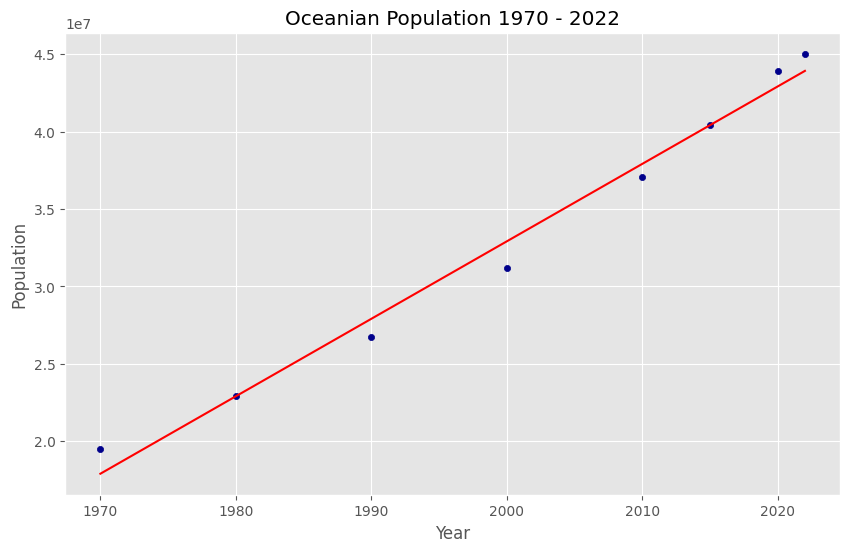

'Oceanian Population = 500544 * Year + -968169960'

In [78]:
# plotting Oceanian Populaion regression line on the scatter plot

population_data_oc_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Oceanian Population 1970 - 2022')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x_oc, fit_oc[0] * x_oc + fit_oc[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit_oc[0], fit_oc[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'Oceanian Population = {0:.0f} * Year + {1:.0f}'.format(fit_oc[0], fit_oc[1]) 

**INDIA 2030 POPULATION PROJECTION**

In [79]:
population_data_can = population_data[(population_data['Country'] == 'India')]

population_data_can['2022'].sum()

1417173173

In [ ]:
# relationship betewen years and total population, we will convert years to int type.

population_data_can_tot = pd.DataFrame(population_data_can[years].sum(axis=0)) 

population_data_can_tot.index = map(int, population_data_can_tot.index)

population_data_can_tot.reset_index(inplace = True) 

population_data_can_tot.columns = ['year', 'total'] 

population_data_can_tot.tail()

,year,total
3,2000,1059633675
4,2010,1240613620
5,2015,1322866505
6,2020,1396387127
7,2022,1417173173


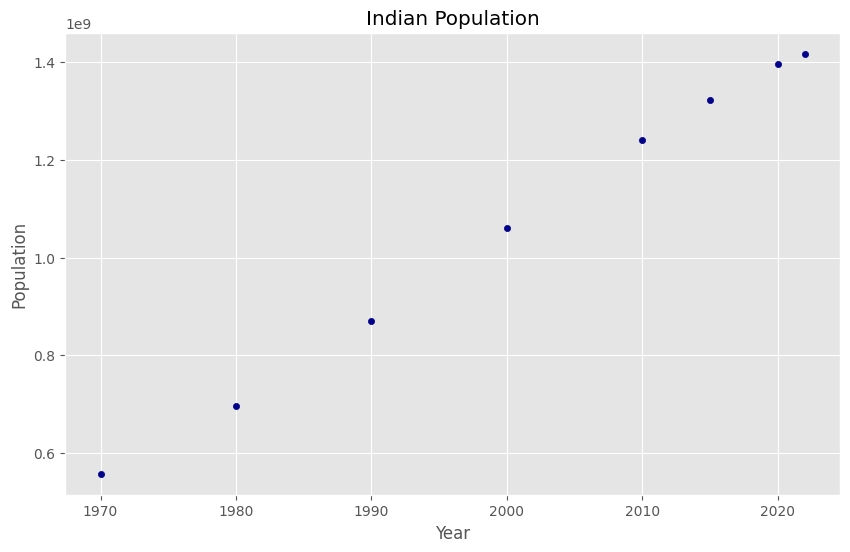

In [81]:
population_data_can_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Indian Population')
plt.xlabel('Year')
plt.ylabel('Population')

plt.show()

In [82]:
x_can = population_data_can_tot['year']      
y_can = population_data_can_tot['total']    
fit_can = np.polyfit(x_can, y_can, deg=1)

fit_can

array([ 1.70954363e+07, -3.31356491e+10])

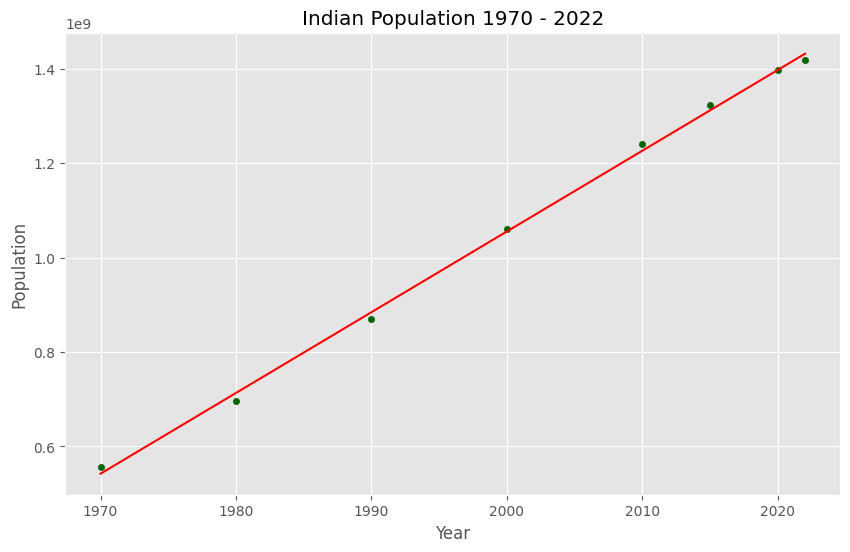

'Indian Population = 17095436 * Year + -33135649132'

In [83]:
# plot the Indian Populaion regression line on the scatter plot

population_data_can_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkgreen')

plt.title('Indian Population 1970 - 2022')
plt.xlabel('Year')
plt.ylabel('Population')

# plot line of best fit
plt.plot(x_can, fit_can[0] * x_can + fit_can[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit_can[0], fit_can[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'Indian Population = {0:.0f} * Year + {1:.0f}'.format(fit_can[0], fit_can[1]) 

In [84]:
year_ind = int(input("enter the year that you wanted to predict the population of India"))
for i in range(year_ind):
    Indian_Population = 17095436 * year_ind + -33135649132
print("The population of India in the year",year_ind,'is:', Indian_Population)

The population of India in the year 2023 is: 1448417896


CLUSTERING

In [85]:
data = pd.read_csv('world_population.csv')
x = data.iloc[:,5:-1]
y = data.iloc[:, 0]
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(x)
clusters = kmeans.predict(x)
labels = pd.DataFrame(clusters)
data = pd.concat([data, labels], axis = 1)
data.rename(columns ={0 :'cluster'}, inplace = True)
clusters = data.groupby(['cluster'])
print(clusters)
print(clusters.mean())

               Rank  2022 Population  2020 Population  2015 Population  \
cluster                                                                  
0         51.810811     2.920782e+07     2.817855e+07     2.562434e+07   
1          1.000000     1.425887e+09     1.424930e+09     1.393715e+09   
2          4.000000     2.755013e+08     2.718580e+08     2.590920e+08   
3        152.469512     3.790629e+06     3.704132e+06     3.482530e+06   
4          2.000000     1.417173e+09     1.396387e+09     1.322867e+09   
5         14.888889     1.035435e+08     1.007891e+08     9.308172e+07   
6          9.333333     1.466171e+08     1.460943e+08     1.432498e+08   
7          3.000000     3.382899e+08     3.359420e+08     3.246078e+08   
8          6.000000     2.232265e+08     2.162402e+08     2.000511e+08   
9         27.357143     5.519901e+07     5.471032e+07     5.268960e+07   

         2010 Population  2000 Population  1990 Population  1980 Population  \
cluster                         

In [86]:
clusters.mean()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
cluster,,,,,,,,,,,,,
0,51.810811,2.920782e+07,2.817855e+07,2.562434e+07,2.333070e+07,1.920392e+07,1.561317e+07,1.252866e+07,9.925158e+06,1.123957e+06,106.307824,1.017903,0.366216
1,1.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,9.706961e+06,146.893300,1.000000,17.880000
2,4.000000,2.755013e+08,2.718580e+08,2.590920e+08,2.440162e+08,2.140724e+08,1.821599e+08,1.481771e+08,1.152284e+08,1.904569e+06,144.652900,1.006400,3.450000
3,152.469512,3.790629e+06,3.704132e+06,3.482530e+06,3.237834e+06,2.810314e+06,2.489712e+06,2.145576e+06,1.834839e+06,1.335412e+05,584.340662,1.008305,0.047195
4,2.000000,1.417173e+09,1.396387e+09,1.322867e+09,1.240614e+09,1.059634e+09,8.704522e+08,6.968284e+08,5.575013e+08,3.287590e+06,431.067500,1.006800,17.770000
5,14.888889,1.035435e+08,1.007891e+08,9.308172e+07,8.526176e+07,7.256244e+07,6.008446e+07,4.832135e+07,3.946455e+07,1.097602e+06,151.073722,1.012856,1.298889
6,9.333333,1.466171e+08,1.460943e+08,1.432498e+08,1.399131e+08,1.342807e+08,1.262799e+08,1.132705e+08,1.010172e+08,5.874581e+06,498.824633,1.000933,1.836667
7,3.000000,3.382899e+08,3.359420e+08,3.246078e+08,3.111828e+08,2.823986e+08,2.480837e+08,2.231400e+08,2.003283e+08,9.372610e+06,36.093500,1.003800,4.240000
8,6.000000,2.232265e+08,2.162402e+08,2.000511e+08,1.839203e+08,1.510319e+08,1.204449e+08,9.195463e+07,7.041000e+07,3.440482e+06,176.420600,1.015933,2.800000
